In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
census = pd.read_csv('census_2011.csv')
census_copy = census.copy()
housing = pd.read_csv('housing.csv')
housing_copy = housing.copy()

In [3]:
census.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,1048.0,...,94.0,588.0,71.0,101.0,172.0,74.0,10.0,84.0,15.0,1119.0
1,2,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,NaN,...,126.0,562.0,72.0,89.0,161.0,96.0,28.0,124.0,18.0,1066.0
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,488.0,...,46.0,122.0,15.0,22.0,NaN,20.0,NaN,NaN,17.0,242.0
3,4,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,18.0,...,27.0,114.0,12.0,18.0,30.0,19.0,3.0,22.0,7.0,214.0
4,5,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,556.0,...,78.0,346.0,35.0,50.0,85.0,59.0,8.0,67.0,12.0,629.0


In [4]:
census.columns

Index(['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC',
       ...
       'Power_Parity_Rs_90000_150000', 'Power_Parity_Rs_45000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_240000_330000',
       'Power_Parity_Rs_150000_330000', 'Power_Parity_Rs_330000_425000',
       'Power_Parity_Rs_425000_545000', 'Power_Parity_Rs_330000_545000',
       'Power_Parity_Above_Rs_545000', 'Total_Power_Parity'],
      dtype='object', length=118)

In [5]:
census_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Columns: 118 entries, District code to Total_Power_Parity
dtypes: float64(115), int64(1), object(2)
memory usage: 590.1+ KB


In [6]:
census_copy.memory_usage(deep=True)

Index                              128
District code                     5120
State name                       42987
District name                    41931
Population                        5120
                                 ...  
Power_Parity_Rs_330000_425000     5120
Power_Parity_Rs_425000_545000     5120
Power_Parity_Rs_330000_545000     5120
Power_Parity_Above_Rs_545000      5120
Total_Power_Parity                5120
Length: 119, dtype: int64

# PS: 1, Filtering the required Columns

In [7]:
census_subset = census_copy[['State name','District name','Population','Male','Female','Literate',
                        'Male_Literate','Female_Literate','Rural_Households','Urban_Households',
                        'Households','Age_Group_0_29','Age_Group_30_49','Age_Group_50',
                        'Age not stated']]

In [8]:
census_subset

,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,PONDICHERRY,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,PONDICHERRY,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


# PS:2, Renaming the  columns

In [9]:
census_subset.rename({'State name': 'State/UT','District name': 'District',
                      'Male_Literate': 'Literate_Male',
                      'Female_Literate': 'Literate_Female',
                      'Rural_Households': 'Households_Rural',
                      'Urban_ Households': 'Households_Urban',
                      'Age_Group_0_29': 'Young_and_Adult',
                      'Age_Group_30_49': 'Middle_Aged',
                      'Age_Group_50': 'Senior_Citizen',
                      'Age not stated' :'Age_Not_Stated'},
                       axis=1, inplace=True)

C:\Users\Miles Education\AppData\Local\Temp\ipykernel_7308\2257808272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_subset.rename({'State name': 'State/UT','District name': 'District',


In [10]:
census_subset

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,PONDICHERRY,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,PONDICHERRY,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [11]:
census_subset.shape

(640, 15)

# PS:3, Renaming State/UT Values

In [12]:
# The State/UT names are in all caps in the census data, 
# For uniformity across datasets we use the names so that only 
# the first character of each word in the name is in upper case and the rest are in lower case. 
# However, if the word is “and” then it should be all lowercase.

census_subset['State/UT'] = census_subset['State/UT'].str.title().replace(' And ',' and ', regex=True)
census_subset = census_subset.replace({'State/UT': {'Orissa': 'Odisha','Pondicherry': 'Puducherry',
                                                    'Nct Of Delhi':'Delhi'}})
census_subset['State/UT'].unique()

C:\Users\Miles Education\AppData\Local\Temp\ipykernel_7308\3019981143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_subset['State/UT'] = census_subset['State/UT'].str.title().replace(' And ',' and ', regex=True)


array(['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Bihar', 'Sikkim', 'Arunachal Pradesh', 'Nagaland', 'Manipur',
       'Mizoram', 'Tripura', 'Meghalaya', 'Assam', 'West Bengal',
       'Jharkhand', 'Odisha', 'Chhattisgarh', 'Madhya Pradesh', 'Gujarat',
       'Daman and Diu', 'Dadra and Nagar Haveli', 'Maharashtra',
       'Andhra Pradesh', 'Karnataka', 'Goa', 'Lakshadweep', 'Kerala',
       'Tamil Nadu', 'Puducherry', 'Andaman and Nicobar Islands'],
      dtype=object)

In [13]:
census_subset['State/UT'].value_counts()

Uttar Pradesh                  71
Madhya Pradesh                 50
Bihar                          38
Maharashtra                    35
Rajasthan                      33
Tamil Nadu                     32
Karnataka                      30
Odisha                         30
Assam                          27
Gujarat                        26
Jharkhand                      24
Andhra Pradesh                 23
Jammu and Kashmir              22
Haryana                        21
Punjab                         20
West Bengal                    19
Chhattisgarh                   18
Arunachal Pradesh              16
Kerala                         14
Uttarakhand                    13
Himachal Pradesh               12
Nagaland                       11
Manipur                         9
Delhi                           9
Mizoram                         8
Meghalaya                       7
Tripura                         4
Sikkim                          4
Puducherry                      4
Andaman and Ni

# PS:4, Formation of new state Telengana

In [14]:
Telengana_District = np.loadtxt('Telangana.txt',dtype="str")
print(Telengana_District)

['Adilabad' 'Nizamabad' 'Karimnagar' 'Medak' 'Hyderabad' 'Rangareddy'
 'Mahbubnagar' 'Nalgonda' 'Warangal' 'Khammam']


In [15]:
#chceking Andhra pradesh district
census_subset.loc[census_subset['State/UT']=='Andhra Pradesh']

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
531,Andhra Pradesh,Adilabad,2741239.0,NaN,1371642.0,1483347.0,856350.0,626997.0,NaN,220248.0,817714.0,1536378.0,704551.0,422522.0,77788.0
532,Andhra Pradesh,Nizamabad,2551335.0,1250641.0,1300694.0,1389810.0,790214.0,599596.0,565165.0,155133.0,720298.0,1399773.0,676401.0,437573.0,37588.0
533,Andhra Pradesh,Karimnagar,3776269.0,1880800.0,1895469.0,2206829.0,1257238.0,949591.0,877236.0,288044.0,1165280.0,1940234.0,1031735.0,728494.0,75806.0
534,Andhra Pradesh,Medak,3033288.0,1523030.0,1510258.0,1637137.0,953406.0,683731.0,593653.0,195479.0,789132.0,1735769.0,779738.0,509368.0,8413.0
535,Andhra Pradesh,Hyderabad,3943323.0,2018575.0,1924748.0,2892155.0,1542688.0,1349467.0,0.0,1066289.0,1066289.0,2249130.0,1068243.0,542669.0,83281.0
536,Andhra Pradesh,Rangareddy,5296741.0,2701008.0,2595733.0,NaN,1948784.0,1589244.0,432098.0,1129224.0,1561322.0,2966988.0,1455864.0,738037.0,135852.0
537,Andhra Pradesh,Mahbubnagar,4053028.0,2050386.0,2002642.0,1940646.0,1158386.0,782260.0,848963.0,161052.0,1010015.0,2360874.0,1027525.0,637430.0,27199.0
538,Andhra Pradesh,Nalgonda,3488809.0,1759772.0,1729037.0,2001019.0,1160757.0,840262.0,833504.0,197433.0,1030937.0,1932349.0,897137.0,651748.0,7575.0
539,Andhra Pradesh,Warangal,3512576.0,1759281.0,1753295.0,2065023.0,1179790.0,885233.0,758738.0,288249.0,1046987.0,1891954.0,941452.0,664872.0,14298.0
540,Andhra Pradesh,Khammam,2797370.0,1390988.0,1406382.0,1630234.0,901640.0,728594.0,669262.0,201363.0,870625.0,1530602.0,774583.0,477955.0,14230.0


In [16]:
Laddakh_district_list = ['Leh(Ladakh)', 'Kargil']

In [17]:
#itteration method to update the Telengana and laddakh district
# for row_no in range(len(census_subset)):
#     #print(district)
#     if census_subset.iloc[row_no,1] in telangana_district_list: #comparing district with andhra district \
#         census_subset.loc[row_no,'State/UT'] = 'Telangana'  #updating state to Telegana

In [18]:
#Updating the Telengana district 
census_subset.loc[census_subset['District'].isin(Telengana_District),'State/UT'] = 'Telangana'
#updating the Laddakh district
census_subset.loc[census_subset['District'].isin(Laddakh_district_list),'State/UT'] = 'Laddakh'

In [19]:
#Changing Leh(Ladakh)
census_subset = census_subset.replace({'District': {'Leh(Ladakh)' : 'Leh'}})
census_subset.loc[census_subset['State/UT']=='Laddakh']

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
2,Laddakh,Leh,133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0


In [20]:
census_subset.loc[census_subset['State/UT']=='Telangana']

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
531,Telangana,Adilabad,2741239.0,NaN,1371642.0,1483347.0,856350.0,626997.0,NaN,220248.0,817714.0,1536378.0,704551.0,422522.0,77788.0
532,Telangana,Nizamabad,2551335.0,1250641.0,1300694.0,1389810.0,790214.0,599596.0,565165.0,155133.0,720298.0,1399773.0,676401.0,437573.0,37588.0
533,Telangana,Karimnagar,3776269.0,1880800.0,1895469.0,2206829.0,1257238.0,949591.0,877236.0,288044.0,1165280.0,1940234.0,1031735.0,728494.0,75806.0
534,Telangana,Medak,3033288.0,1523030.0,1510258.0,1637137.0,953406.0,683731.0,593653.0,195479.0,789132.0,1735769.0,779738.0,509368.0,8413.0
535,Telangana,Hyderabad,3943323.0,2018575.0,1924748.0,2892155.0,1542688.0,1349467.0,0.0,1066289.0,1066289.0,2249130.0,1068243.0,542669.0,83281.0
536,Telangana,Rangareddy,5296741.0,2701008.0,2595733.0,NaN,1948784.0,1589244.0,432098.0,1129224.0,1561322.0,2966988.0,1455864.0,738037.0,135852.0
537,Telangana,Mahbubnagar,4053028.0,2050386.0,2002642.0,1940646.0,1158386.0,782260.0,848963.0,161052.0,1010015.0,2360874.0,1027525.0,637430.0,27199.0
538,Telangana,Nalgonda,3488809.0,1759772.0,1729037.0,2001019.0,1160757.0,840262.0,833504.0,197433.0,1030937.0,1932349.0,897137.0,651748.0,7575.0
539,Telangana,Warangal,3512576.0,1759281.0,1753295.0,2065023.0,1179790.0,885233.0,758738.0,288249.0,1046987.0,1891954.0,941452.0,664872.0,14298.0
540,Telangana,Khammam,2797370.0,1390988.0,1406382.0,1630234.0,901640.0,728594.0,669262.0,201363.0,870625.0,1530602.0,774583.0,477955.0,14230.0


# PS:5, Checking the processing the missing data.

In [21]:
missing_data = census_subset.isnull().sum() * 100 / len(census_subset)
missing_data

State/UT            0.00000
District            0.00000
Population          4.68750
Male                4.68750
Female              5.15625
Literate            5.62500
Literate_Male       4.84375
Literate_Female     4.21875
Households_Rural    6.56250
Urban_Households    5.15625
Households          5.00000
Young_and_Adult     4.84375
Middle_Aged         4.68750
Senior_Citizen      4.84375
Age_Not_Stated      5.46875
dtype: float64

In [22]:
missing_data_BeforeFillingValues= pd.DataFrame({'Variables': census_subset.columns,
                         'Percent_Missing_Before' : missing_data})

missing_data_BeforeFillingValues.sort_values('Percent_Missing_Before',inplace=True)
missing_data_BeforeFillingValues #.iloc[2:,:]

,Variables,Percent_Missing_Before
State/UT,State/UT,0.00000
District,District,0.00000
Literate_Female,Literate_Female,4.21875
Population,Population,4.68750
Male,Male,4.68750
Middle_Aged,Middle_Aged,4.68750
Literate_Male,Literate_Male,4.84375
Young_and_Adult,Young_and_Adult,4.84375
Senior_Citizen,Senior_Citizen,4.84375
Households,Households,5.00000


In [23]:
census_subset

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh,133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Puducherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,Puducherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [24]:
print(census_subset['Population'].isnull().sum())
print(census_subset['Male'].isnull().sum())
print(census_subset['Female'].isnull().sum())

30
30
33


In [25]:
#Filling the population missing data
def FillingMissingPopulation(df):
    for Value in range(len(df)):
   #print(i,pd.isna(census_subset.loc[i,'Population']))
        if pd.isna(df.loc[Value,'Population']):
            df.loc[Value,'Population'] = df.loc[Value,'Male'] + df.loc[Value,'Female']
        elif pd.isna(df.loc[Value,'Male']):
            df.loc[Value,'Male'] = df.loc[Value,'Population'] - df.loc[Value,'Female']
        elif pd.isna(df.loc[Value,'Female']):
            df.loc[Value,'Female'] = df.loc[Value,'Population'] - df.loc[Value,'Male']
            
FillingMissingPopulation(census_subset)

In [26]:
#to check null values in population column
#to check null values in Male columns
#to check null values in Female columns
print(census_subset['Population'].isnull().sum())
print(census_subset['Male'].isnull().sum())
print(census_subset['Female'].isnull().sum())

1
1
0


In [27]:
#to check the missing value for Litrate
print(census_subset['Literate'].isnull().sum())
print(census_subset['Literate_Male'].isnull().sum())
print(census_subset['Literate_Female'].isnull().sum())

36
31
27


In [28]:
# Filling the Litrate missing data
def FillingMissingLitrate(df):
    for Value in range(len(df)):
   #print(i,pd.isna(census_subset.loc[i,'Population']))
        if pd.isna(df.loc[Value,'Literate']):
            df.loc[Value,'Literate'] = df.loc[Value,'Literate_Male'] + df.loc[Value,'Literate_Female']
        elif pd.isna(df.loc[Value,'Literate_Male']):
            df.loc[Value,'Literate_Male'] = df.loc[Value,'Literate'] - df.loc[Value,'Literate_Female']
        elif pd.isna(df.loc[Value,'Literate_Female']):
            df.loc[Value,'Literate_Female'] = df.loc[Value,'Literate'] - df.loc[Value,'Literate_Male']
FillingMissingLitrate(census_subset)

In [29]:
# def Census_Litrate(df):
#    ##for filling Literate missing data   
#     df.loc[df['Literate'].isnull(),'Literate'] = df['Literate_Male'] + df['Literate_Female']
#     #for filling literate male missing data 
#     df.loc[df['Literate_Male'].isnull(),'Literate_Male'] = df['Literate'] - df['Literate_Female']
#     #for filling literate female missing data 
#     df.loc[df['Literate_Female'].isnull(),'Literate_Female'] = df['Literate'] - df['Literate_Male']
# Census_Litrate(census_subset)

In [30]:
print(census_subset['Literate_Male'].isnull().sum())
print(census_subset['Literate_Female'].isnull().sum())
print(census_subset['Literate'].isnull().sum())

2
2
2


In [31]:
print(census_subset['Households'].isnull().sum())
print(census_subset['Households_Rural'].isnull().sum())
print(census_subset['Urban_Households'].isnull().sum())

32
42
33


In [32]:
#filling household missing data
def FillingMissingHousehold(df):
    for Value in range(len(df)):
        if pd.isna(df.loc[Value,'Households']):
            df.loc[Value,'Households'] = df.loc[Value,'Households_Rural'] + df.loc[Value,'Urban_Households']
        elif pd.isna(df.loc[Value,'Households_Rural']):
            df.loc[Value,'Households_Rural'] = df.loc[Value,'Households'] - df.loc[Value,'Urban_Households']
        elif pd.isna(df.loc[Value,'Urban_Households']):
            df.loc[Value,'Urban_Households'] = df.loc[Value,'Households'] - df.loc[Value,'Households_Rural']

FillingMissingHousehold(census_subset)            

In [33]:
print(census_subset['Households'].isnull().sum())
print(census_subset['Households_Rural'].isnull().sum())
print(census_subset['Urban_Households'].isnull().sum())

5
6
3


In [34]:
print(census_subset['Young_and_Adult'].isnull().sum())
print(census_subset['Middle_Aged'].isnull().sum())
print(census_subset['Senior_Citizen'].isnull().sum())
print(census_subset['Age_Not_Stated'].isnull().sum())

31
30
31
35


In [35]:
#Filling the missing data for different aged group
def DifferentAgedGroupedData(df):
    for Value in range(len(df)):
        if pd.isna(df.loc[Value,'Young_and_Adult']):
            df.loc[Value,'Young_and_Adult'] = df.loc[Value,'Population'] - (
            df.loc[Value,'Middle_Aged'] + df.loc[Value,'Senior_Citizen'] + df.loc[Value,'Age_Not_Stated'])
        
        if pd.isna(df.loc[Value,'Middle_Aged']):
            df.loc[Value,'Middle_Aged'] = df.loc[Value,'Population'] - (
            df.loc[Value,'Young_and_Adult'] + df.loc[Value,'Senior_Citizen'] + df.loc[Value,'Age_Not_Stated'])
        
        if pd.isna(df.loc[Value,'Senior_Citizen']):
            df.loc[Value,'Senior_Citizen'] = df.loc[Value,'Population'] - (
            df.loc[Value,'Young_and_Adult'] + df.loc[Value,'Middle_Aged'] + df.loc[Value,'Age_Not_Stated'])
        
        if pd.isna(df.loc[Value,'Age_Not_Stated']):
            df.loc[Value,'Age_Not_Stated'] = df.loc[Value,'Population'] - (
            df.loc[Value,'Young_and_Adult'] + df.loc[Value,'Middle_Aged'] + df.loc[Value,'Senior_Citizen'])
    
DifferentAgedGroupedData(census_subset)

In [36]:
print(census_subset['Young_and_Adult'].isnull().sum())
print(census_subset['Middle_Aged'].isnull().sum())
print(census_subset['Senior_Citizen'].isnull().sum())
print(census_subset['Age_Not_Stated'].isnull().sum())

4
6
8
3


#To fill the missing the data in a single line. 

In [37]:
#census_subset.loc[census_subset['Population'].isnull(),'Population']=census_subset['Male']+census_subset['Female']
#census_subset.loc[census_subset['Literate'].isnull(),'Literate']=census_subset['Literate_Male']+census_subset['Literate_Female']
#census_subset.loc[census_subset['Literate'].isnull(),'Literate']=census_subset['Literate_Male']+census_subset['Literate_Female']

In [38]:
census_subset

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh,133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0
3,Laddakh,Kargil,140802.0,77785.0,63017.0,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Puducherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,12543.0,9428.0,85.0
636,Puducherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,16115.0,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [39]:
#checking the missing data after filling the data
MissingDataAfter = census_subset.isnull().sum() *100 / len(census_subset)
MissingDataAfter

State/UT            0.00000
District            0.00000
Population          0.15625
Male                0.15625
Female              0.00000
Literate            0.31250
Literate_Male       0.31250
Literate_Female     0.31250
Households_Rural    0.93750
Urban_Households    0.46875
Households          0.78125
Young_and_Adult     0.62500
Middle_Aged         0.93750
Senior_Citizen      1.25000
Age_Not_Stated      0.46875
dtype: float64

In [40]:
#finding out missing percetage
DataMissingPercentageAfter = pd.DataFrame({'Variables': census_subset.columns,
                                          'Percent_Missing_After': MissingDataAfter})
DataMissingPercentageAfter.sort_values('Percent_Missing_After',inplace=True)
DataMissingPercentageAfter

,Variables,Percent_Missing_After
State/UT,State/UT,0.00000
District,District,0.00000
Female,Female,0.00000
Population,Population,0.15625
Male,Male,0.15625
Literate,Literate,0.31250
Literate_Male,Literate_Male,0.31250
Literate_Female,Literate_Female,0.31250
Urban_Households,Urban_Households,0.46875
Age_Not_Stated,Age_Not_Stated,0.46875


In [41]:
DataAfterAndBefore = pd.merge(missing_data_BeforeFillingValues,DataMissingPercentageAfter, on='Variables')
DataAfterAndBefore

,Variables,Percent_Missing_Before,Percent_Missing_After
0,State/UT,0.00000,0.00000
1,District,0.00000,0.00000
2,Literate_Female,4.21875,0.31250
3,Population,4.68750,0.15625
4,Male,4.68750,0.15625
5,Middle_Aged,4.68750,0.93750
6,Literate_Male,4.84375,0.31250
7,Young_and_Adult,4.84375,0.62500
8,Senior_Citizen,4.84375,1.25000
9,Households,5.00000,0.78125


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(-2.0, 0, 'Literate'),
  Text(0.0, 0, 'State/UT'),
  Text(2.0, 0, 'Literate_Female'),
  Text(4.0, 0, 'Male'),
  Text(6.0, 0, 'Literate_Male'),
  Text(8.0, 0, 'Senior_Citizen'),
  Text(10.0, 0, 'Female'),
  Text(12.0, 0, 'Age_Not_Stated'),
  Text(14.0, 0, 'Households_Rural'),
  Text(16.0, 0, '')])

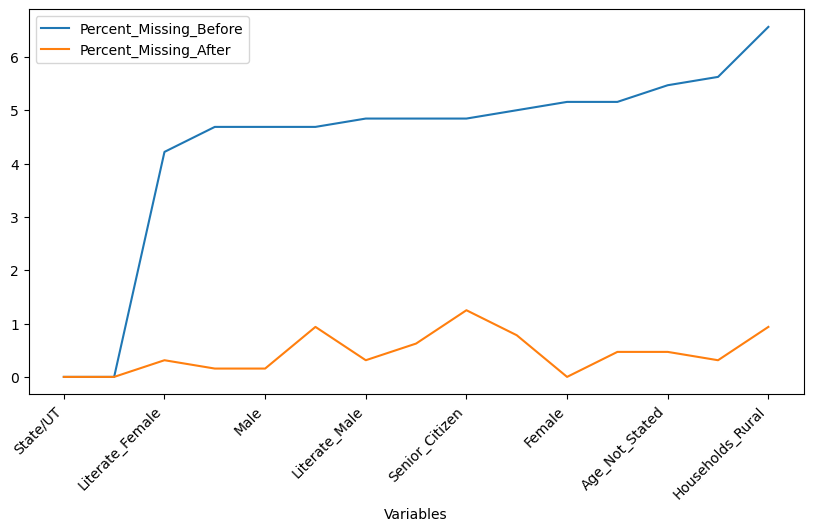

In [42]:
DataAfterAndBefore.plot(x='Variables',figsize=(10,5),kind='line')
plt.xticks(rotation=45,ha='right')
# DataAfterAndBefore.set_xticklabels(ax.get_xticks(), rotation = 45)

In [43]:
# bar_plot1 = sns.barplot(x='Variables', y='Percent_Missing_Before', data=DataAfterAndBefore, label="Before", color="red")
# bar_plot2 = sns.barplot(x='Variables', y='Percent_Missing_After', data=DataAfterAndBefore, label="After", color="green")
# plt.legend(ncol=2, loc="upper right", frameon=True)
# plt.xticks(rotation=45,ha='right')

# plt.show()

# PS: 6, Exporting processed data to .csv

In [44]:
census_subset.to_csv('census.csv')

# PS: 7, Extracting Information from the housing data along with the census data and processing the relevent data

In [45]:
housing_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Columns: 156 entries, State Code to Residence_cum_Good
dtypes: float64(142), int64(9), object(5)
memory usage: 2.3+ MB


In [46]:
housing_copy

,State Code,State Name,District Code,District Name,Tehsil Code,Tehsil Name,Town Code/Village code,Ward No,Area Name,Rural/Urban,...,Contition_T_Total,Contition_T_Good,Contition_T_Livable,Contition_T_Dilapidated,Contition_R_Total,Residence_Good,Residence_Livable,Residence_Dilapidated,Residence_cum_other,Residence_cum_Good
0,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Rural,...,100,33.6,58.1,8.3,90.9,32.7,51.0,7.2,9.1,1.0
1,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Total,...,100,34.8,57.3,7.9,91.0,33.8,50.2,6.9,9.0,0.9
2,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Urban,...,100,45.7,49.5,4.8,91.8,45.0,42.2,4.5,8.2,0.7
3,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Rural,...,100,49.7,46.3,3.9,97.2,49.0,44.5,3.7,2.8,0.7
4,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Total,...,100,51.6,44.7,3.8,97.3,50.8,43.0,3.5,2.7,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,35,ANDAMAN & NICOBAR ISLANDS,639,North & Middle Andaman,0,North & Middle Andaman,0,0,District - North & Middle Andaman,Total,...,100,52.6,44.6,2.8,97.5,51.2,43.5,2.8,2.5,1.4
1904,35,ANDAMAN & NICOBAR ISLANDS,639,North & Middle Andaman,0,North & Middle Andaman,0,0,District - North & Middle Andaman,Urban,...,100,37.5,55.9,6.6,95.8,36.3,53.0,6.5,4.2,1.2
1905,35,ANDAMAN & NICOBAR ISLANDS,640,South Andaman,0,South Andaman,0,0,District - South Andaman,Rural,...,100,63.0,33.5,3.5,98.3,62.0,32.8,3.5,1.7,1.0
1906,35,ANDAMAN & NICOBAR ISLANDS,640,South Andaman,0,South Andaman,0,0,District - South Andaman,Total,...,100,71.5,26.4,2.2,98.5,70.6,25.8,2.1,1.5,0.9


In [47]:
housing_subset = housing_copy[['District Name','Rural/Urban',
                               'Total Number of households',
                               'Total Number of Livable',
                               'Total Number of Dilapidated',
                               'Latrine_premise']]

In [48]:
RuralData=housing_subset[housing_subset['Rural/Urban'] == 'Rural']
UrbanData=housing_subset[housing_subset['Rural/Urban'] == 'Urban']

# Replacing the name of Leh(Ladakh) to Leh for simplicity 
RuralData = RuralData.replace({'District Name': {'Leh(Ladakh)' : 'Leh'}})
UrbanData = UrbanData.replace({'District Name': {'Leh(Ladakh)' : 'Leh'}})
UrbanData

,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
2,Kupwara,Urban,100,49.5,4.8,70.2
5,Badgam,Urban,100,33.8,2.6,90.4
8,Leh,Urban,100,54.6,1.1,95.8
11,Kargil,Urban,100,68.8,1.2,97.5
14,Punch,Urban,100,27.3,0.8,75.3
...,...,...,...,...,...,...
1894,Puducherry,Urban,100,19.0,1.2,82.5
1896,Mahe,Urban,100,15.8,1.1,97.8
1899,Karaikal,Urban,100,21.0,1.2,74.4
1904,North & Middle Andaman,Urban,100,55.9,6.6,56.1


In [49]:
RuralData.rename({'District Name' : 'District',
                             'Rural/Urban': 'Rural',
                             'Total Number of households':'Households_Rural',
                             'Total Number of Livable': 'Households_Rural_Livable',
                             'Total Number of Dilapidated':'Households_Rural_Dilapidated',
                             'Latrine_premise': 'Households_Rural_Toilet_Premise'},
                axis=1,inplace=True)
RuralData

,District,Rural,Households_Rural,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise
0,Kupwara,Rural,100,58.1,8.3,48.9
3,Badgam,Rural,100,46.3,3.9,83.3
6,Leh,Rural,100,51.5,2.1,88.1
9,Kargil,Rural,100,73.3,3.5,96.8
12,Punch,Rural,100,59.5,2.4,13.7
...,...,...,...,...,...,...
1892,Puducherry,Rural,100,31.9,2.6,35.8
1897,Karaikal,Rural,100,36.8,2.1,47.6
1900,Nicobars,Rural,100,23.8,1.2,80.9
1902,North & Middle Andaman,Rural,100,44.3,2.7,48.0


In [50]:
UrbanData.rename({'District Name' : 'District',
                             'Rural/Urban': 'Urban',
                             'Total Number of households':'Households_Urban',
                             'Total Number of Livable': 'Households_Urban_Livable',
                             'Total Number of Dilapidated':'Households_Urban_Dilapidated',
                             'Latrine_premise': 'Households_Urban_Toilet_Premise'},
                axis=1,inplace=True)
UrbanData

,District,Urban,Households_Urban,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
2,Kupwara,Urban,100,49.5,4.8,70.2
5,Badgam,Urban,100,33.8,2.6,90.4
8,Leh,Urban,100,54.6,1.1,95.8
11,Kargil,Urban,100,68.8,1.2,97.5
14,Punch,Urban,100,27.3,0.8,75.3
...,...,...,...,...,...,...
1894,Puducherry,Urban,100,19.0,1.2,82.5
1896,Mahe,Urban,100,15.8,1.1,97.8
1899,Karaikal,Urban,100,21.0,1.2,74.4
1904,North & Middle Andaman,Urban,100,55.9,6.6,56.1


In [51]:
census_subset

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh,133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0
3,Laddakh,Kargil,140802.0,77785.0,63017.0,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Puducherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,12543.0,9428.0,85.0
636,Puducherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,16115.0,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [52]:
#Rural and Urban Subset Data from Census Data
RuralHouseholdInfo = census_subset[['District','Households_Rural']]
UrbanHouseholdInfo = census_subset[['District','Urban_Households']]
RuralHouseholdInfo

,District,Households_Rural
0,Kupwara,158438.0
1,Badgam,160649.0
2,Leh,36920.0
3,Kargil,40370.0
4,Punch,132139.0
...,...,...
635,Mahe,0.0
636,Karaikal,35618.0
637,Nicobars,15958.0
638,North AND Middle Andaman,39091.0


In [53]:
UrbanHouseholdInfo

,District,Urban_Households
0,Kupwara,23226.0
1,Badgam,27190.0
2,Leh,17474.0
3,Kargil,7774.0
4,Punch,15269.0
...,...,...
635,Mahe,12110.0
636,Karaikal,33715.0
637,Nicobars,0.0
638,North AND Middle Andaman,1094.0


In [54]:
#merging Rural Table from Census and housing Data
Rural = pd.merge(RuralData,RuralHouseholdInfo, on='District')
Rural.drop(['Households_Rural_x','Rural'], axis=1, inplace=True)
Rural.rename({'Households_Rural_y':'Households_Rural'},axis=1, inplace=True)

#Changing the location of the columns
Rural = Rural.loc[:,['District','Households_Rural',
             'Households_Rural_Livable','Households_Rural_Dilapidated',
            'Households_Rural_Toilet_Premise']]
Rural

,District,Households_Rural,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise
0,Kupwara,158438.0,58.1,8.3,48.9
1,Badgam,160649.0,46.3,3.9,83.3
2,Leh,36920.0,51.5,2.1,88.1
3,Kargil,40370.0,73.3,3.5,96.8
4,Punch,132139.0,59.5,2.4,13.7
...,...,...,...,...,...
633,Coimbatore,284795.0,27.4,1.6,33.3
634,Tiruppur,356886.0,27.6,1.7,30.9
635,Karaikal,35618.0,36.8,2.1,47.6
636,Nicobars,15958.0,23.8,1.2,80.9


In [55]:
#converting percentage value to absolute value for Rural area
Rural['Households_Rural_Livable'] = (Rural['Households_Rural'] * Rural['Households_Rural_Livable'])/100
Rural['Households_Rural_Dilapidated'] = (Rural['Households_Rural'] * Rural['Households_Rural_Dilapidated']) / 100
Rural['Households_Rural_Toilet_Premise'] = (Rural['Households_Rural'] * Rural['Households_Rural_Toilet_Premise']) / 100
Rural

,District,Households_Rural,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise
0,Kupwara,158438.0,92052.478,13150.354,77476.182
1,Badgam,160649.0,74380.487,6265.311,133820.617
2,Leh,36920.0,19013.800,775.320,32526.520
3,Kargil,40370.0,29591.210,1412.950,39078.160
4,Punch,132139.0,78622.705,3171.336,18103.043
...,...,...,...,...,...
633,Coimbatore,284795.0,78033.830,4556.720,94836.735
634,Tiruppur,356886.0,98500.536,6067.062,110277.774
635,Karaikal,35618.0,13107.424,747.978,16954.168
636,Nicobars,15958.0,3798.004,191.496,12910.022


In [56]:
#merging the urban table from housing and census table
Urban = pd.merge(UrbanHouseholdInfo,UrbanData,on='District')
Urban.drop(['Households_Urban','Urban'], axis=1, inplace=True)
Urban.rename({'Urban_Households':'Households_Urban'},axis=1, inplace=True)

Urban

,District,Households_Urban,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Kupwara,23226.0,49.5,4.8,70.2
1,Badgam,27190.0,33.8,2.6,90.4
2,Leh,17474.0,54.6,1.1,95.8
3,Kargil,7774.0,68.8,1.2,97.5
4,Punch,15269.0,27.3,0.8,75.3
...,...,...,...,...,...
640,Tiruppur,538022.0,23.6,0.7,75.0
641,Yanam,15519.0,15.4,0.7,81.9
642,Mahe,12110.0,15.8,1.1,97.8
643,Karaikal,33715.0,21.0,1.2,74.4


In [57]:
#converting the percentage value to absolute value for urban area
Urban['Households_Urban_Livable'] = (Urban['Households_Urban'] * Urban['Households_Urban_Livable']) / 100
Urban['Households_Urban_Dilapidated'] = (Urban['Households_Urban'] * Urban['Households_Urban_Dilapidated']) / 100
Urban['Households_Urban_Toilet_Premise'] = (Urban['Households_Urban'] * Urban['Households_Urban_Toilet_Premise']) / 100
Urban

,District,Households_Urban,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Kupwara,23226.0,11496.870,1114.848,16304.652
1,Badgam,27190.0,9190.220,706.940,24579.760
2,Leh,17474.0,9540.804,192.214,16740.092
3,Kargil,7774.0,5348.512,93.288,7579.650
4,Punch,15269.0,4168.437,122.152,11497.557
...,...,...,...,...,...
640,Tiruppur,538022.0,126973.192,3766.154,403516.500
641,Yanam,15519.0,2389.926,108.633,12710.061
642,Mahe,12110.0,1913.380,133.210,11843.580
643,Karaikal,33715.0,7080.150,404.580,25083.960


In [58]:
#merging Rural and urban Data.
CleanedHousingData = pd.merge(Rural,Urban,on='District')
CleanedHousingData

,District,Households_Rural,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Kupwara,158438.0,92052.478,13150.354,77476.182,23226.0,11496.870,1114.848,16304.652
1,Badgam,160649.0,74380.487,6265.311,133820.617,27190.0,9190.220,706.940,24579.760
2,Leh,36920.0,19013.800,775.320,32526.520,17474.0,9540.804,192.214,16740.092
3,Kargil,40370.0,29591.210,1412.950,39078.160,7774.0,5348.512,93.288,7579.650
4,Punch,132139.0,78622.705,3171.336,18103.043,15269.0,4168.437,122.152,11497.557
...,...,...,...,...,...,...,...,...,...
703,Krishnagiri,437988.0,143222.076,9635.736,84093.696,142552.0,26087.016,855.312,111618.216
704,Coimbatore,284795.0,78033.830,4556.720,94836.735,884957.0,213274.637,7079.656,689381.503
705,Tiruppur,356886.0,98500.536,6067.062,110277.774,538022.0,126973.192,3766.154,403516.500
706,Karaikal,35618.0,13107.424,747.978,16954.168,33715.0,7080.150,404.580,25083.960


In [59]:
#Exported to housing1.csv file
CleanedHousingData.to_csv('housing1.csv')

# PS: 8, Visualising the house data

In [60]:
#created subset with required columns
housingInfo = housing_copy[['State Name', 'District Name', 'Latrine_premise']]

In [61]:
housingInfo

,State Name,District Name,Latrine_premise
0,JAMMU & KASHMIR,Kupwara,48.9
1,JAMMU & KASHMIR,Kupwara,50.9
2,JAMMU & KASHMIR,Kupwara,70.2
3,JAMMU & KASHMIR,Badgam,83.3
4,JAMMU & KASHMIR,Badgam,84.3
...,...,...,...
1903,ANDAMAN & NICOBAR ISLANDS,North & Middle Andaman,48.3
1904,ANDAMAN & NICOBAR ISLANDS,North & Middle Andaman,56.1
1905,ANDAMAN & NICOBAR ISLANDS,South Andaman,64.7
1906,ANDAMAN & NICOBAR ISLANDS,South Andaman,78.3


In [62]:
#Replace the '&' and 'AND' with "and"
housingInfo['State Name'] = housingInfo['State Name'].str.title().replace(' & ',' and ', regex=True)
housingInfo['District Name'] = housingInfo['District Name'].str.title().replace(' & ',' and ', regex=True)

housingInfo = housingInfo.replace({'State Name': {'Orissa': 'Odisha','Pondicherry': 'Puducherry',
                                                    'Nct Of Delhi':'Delhi'}})

housingInfo

C:\Users\Miles Education\AppData\Local\Temp\ipykernel_7308\3993764780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housingInfo['State Name'] = housingInfo['State Name'].str.title().replace(' & ',' and ', regex=True)
C:\Users\Miles Education\AppData\Local\Temp\ipykernel_7308\3993764780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housingInfo['District Name'] = housingInfo['District Name'].str.title().replace(' & ',' and ', regex=True)


,State Name,District Name,Latrine_premise
0,Jammu and Kashmir,Kupwara,48.9
1,Jammu and Kashmir,Kupwara,50.9
2,Jammu and Kashmir,Kupwara,70.2
3,Jammu and Kashmir,Badgam,83.3
4,Jammu and Kashmir,Badgam,84.3
...,...,...,...
1903,Andaman and Nicobar Islands,North and Middle Andaman,48.3
1904,Andaman and Nicobar Islands,North and Middle Andaman,56.1
1905,Andaman and Nicobar Islands,South Andaman,64.7
1906,Andaman and Nicobar Islands,South Andaman,78.3


In [63]:
#Renaming the columns
housingInfo.rename({'State Name' : 'State/UT',
                    'District Name': 'District'},
                    axis=1,inplace=True)
housingInfo['State/UT'].nunique()

35

In [64]:
housingInfo.loc[housingInfo['District'].isin(Telengana_District),'State/UT'] = 'Telangana'
#updating the Laddakh district
housingInfo.loc[housingInfo['District'].isin(Laddakh_district_list),'State/UT'] = 'Laddakh'

In [65]:
#Changing Leh(Ladakh)
housingInfo = housingInfo.replace({'District': {'Leh(Ladakh)' : 'Leh'}})
housingInfo.loc[housingInfo['State/UT']=='Laddakh']

,State/UT,District,Latrine_premise
6,Laddakh,Leh,88.1
7,Laddakh,Leh,90.4
8,Laddakh,Leh,95.8
9,Laddakh,Kargil,96.8
10,Laddakh,Kargil,96.9
11,Laddakh,Kargil,97.5


In [66]:
housingInfo

,State/UT,District,Latrine_premise
0,Jammu and Kashmir,Kupwara,48.9
1,Jammu and Kashmir,Kupwara,50.9
2,Jammu and Kashmir,Kupwara,70.2
3,Jammu and Kashmir,Badgam,83.3
4,Jammu and Kashmir,Badgam,84.3
...,...,...,...
1903,Andaman and Nicobar Islands,North and Middle Andaman,48.3
1904,Andaman and Nicobar Islands,North and Middle Andaman,56.1
1905,Andaman and Nicobar Islands,South Andaman,64.7
1906,Andaman and Nicobar Islands,South Andaman,78.3


In [67]:
#Created census subset to collect the required info.
censusInfo = census_subset[['State/UT', 'District', 'Population', 'Households']]

#to rename the North And Middle Andaman to remove the mismatch
censusInfo['District'] = censusInfo['District'].str.title().replace(' AND ',' and ', regex=True)

C:\Users\Miles Education\AppData\Local\Temp\ipykernel_7308\2944813389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  censusInfo['District'] = censusInfo['District'].str.title().replace(' AND ',' and ', regex=True)


In [68]:
censusInfo

,State/UT,District,Population,Households
0,Jammu and Kashmir,Kupwara,870354.0,181664.0
1,Jammu and Kashmir,Badgam,753745.0,187839.0
2,Laddakh,Leh,133487.0,54394.0
3,Laddakh,Kargil,140802.0,48144.0
4,Jammu and Kashmir,Punch,476835.0,147408.0
...,...,...,...,...
635,Puducherry,Mahe,41816.0,12110.0
636,Puducherry,Karaikal,200222.0,69333.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,15958.0
638,Andaman and Nicobar Islands,North And Middle Andaman,105597.0,40185.0


In [69]:
#merging Housing and censes info table
HousingCensus = pd.merge(censusInfo,housingInfo,how='inner')
HousingCensus.drop('District', axis=1,inplace=True)

In [70]:
HousingCensus

,State/UT,Population,Households,Latrine_premise
0,Jammu and Kashmir,870354.0,181664.0,48.9
1,Jammu and Kashmir,870354.0,181664.0,50.9
2,Jammu and Kashmir,870354.0,181664.0,70.2
3,Jammu and Kashmir,753745.0,187839.0,83.3
4,Jammu and Kashmir,753745.0,187839.0,84.3
...,...,...,...,...
1892,Andaman and Nicobar Islands,36842.0,15958.0,80.9
1893,Andaman and Nicobar Islands,36842.0,15958.0,80.9
1894,Andaman and Nicobar Islands,238142.0,85532.0,64.7
1895,Andaman and Nicobar Islands,238142.0,85532.0,78.3


In [71]:
#converting Latrine_premise percentage into absolute value
HousingCensus['Latrine_premise'] = (HousingCensus['Households'] * HousingCensus['Latrine_premise'] ) / 100

In [72]:
HousingCensus

,State/UT,Population,Households,Latrine_premise
0,Jammu and Kashmir,870354.0,181664.0,88833.696
1,Jammu and Kashmir,870354.0,181664.0,92466.976
2,Jammu and Kashmir,870354.0,181664.0,127528.128
3,Jammu and Kashmir,753745.0,187839.0,156469.887
4,Jammu and Kashmir,753745.0,187839.0,158348.277
...,...,...,...,...
1892,Andaman and Nicobar Islands,36842.0,15958.0,12910.022
1893,Andaman and Nicobar Islands,36842.0,15958.0,12910.022
1894,Andaman and Nicobar Islands,238142.0,85532.0,55339.204
1895,Andaman and Nicobar Islands,238142.0,85532.0,66971.556


In [73]:
#finding out No of households for 100 people
NoOfHousholdPer100People = (HousingCensus['Households'] / HousingCensus['Population'])*100

In [74]:
#Inserting new columns No_Of_Housholds_Per_100_People at position 5
HousingCensus.insert(4,'No_Of_Housholds_Per_100_People',NoOfHousholdPer100People)

In [75]:
HousingCensus

,State/UT,Population,Households,Latrine_premise,No_Of_Housholds_Per_100_People
0,Jammu and Kashmir,870354.0,181664.0,88833.696,20.872427
1,Jammu and Kashmir,870354.0,181664.0,92466.976,20.872427
2,Jammu and Kashmir,870354.0,181664.0,127528.128,20.872427
3,Jammu and Kashmir,753745.0,187839.0,156469.887,24.920762
4,Jammu and Kashmir,753745.0,187839.0,158348.277,24.920762
...,...,...,...,...,...
1892,Andaman and Nicobar Islands,36842.0,15958.0,12910.022,43.314695
1893,Andaman and Nicobar Islands,36842.0,15958.0,12910.022,43.314695
1894,Andaman and Nicobar Islands,238142.0,85532.0,55339.204,35.916386
1895,Andaman and Nicobar Islands,238142.0,85532.0,66971.556,35.916386


In [76]:
#Grouping by state and sorting the it by No_Of_Housholds_Per_100_People
Housholds100People = HousingCensus.groupby(['State/UT'])[
    ['No_Of_Housholds_Per_100_People']].mean().reset_index().sort_values(
    by = ['No_Of_Housholds_Per_100_People'], ascending=False)

In [77]:
Housholds100People

,State/UT,No_Of_Housholds_Per_100_People
12,Himachal Pradesh,42.950109
9,Goa,39.502190
0,Andaman and Nicobar Islands,38.875710
34,Uttarakhand,38.165581
17,Laddakh,37.470617
7,Daman and Diu,36.689473
16,Kerala,34.116423
18,Lakshadweep,32.947125
30,Tamil Nadu,32.699631
1,Andhra Pradesh,31.489959


Text(0.5, 1.0, 'Number of households for 100 people')

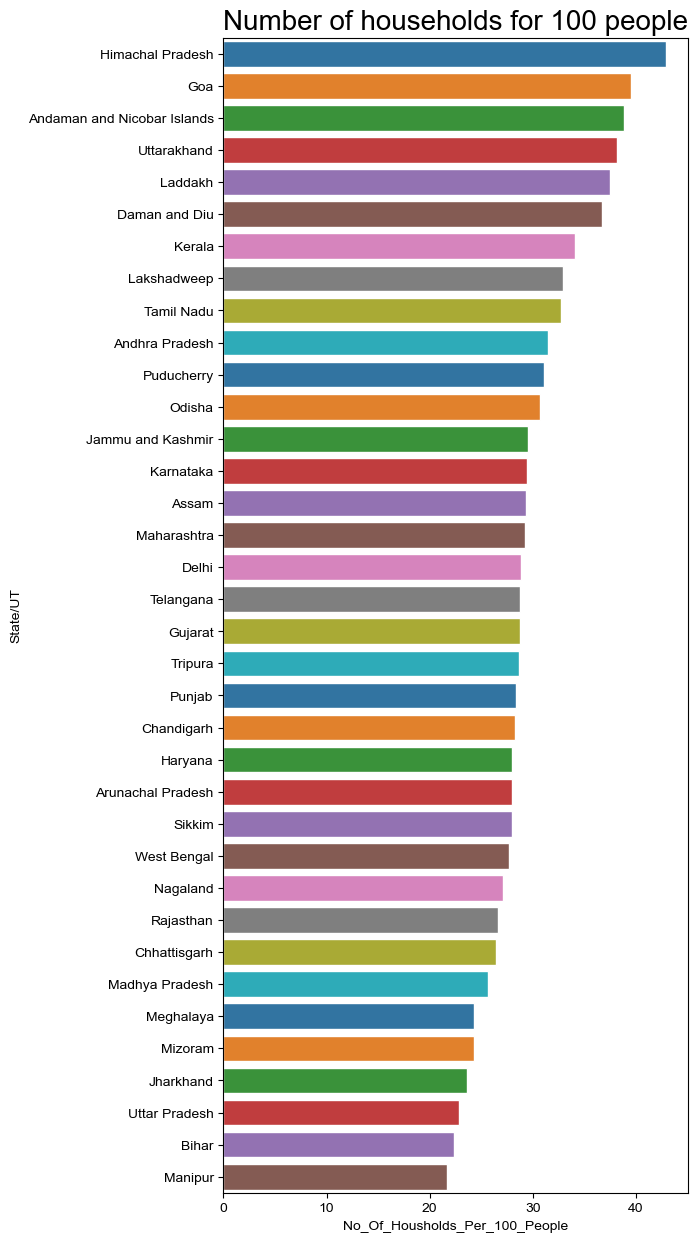

In [78]:
#Ploting for Number of households for 100 people
fig, ax = plt.subplots(figsize=(6, 15))
sns.set(font_scale=1.5)
sns.barplot(data = Housholds100People,
            x='No_Of_Housholds_Per_100_People',
            y='State/UT', palette='tab10',ax=ax)
plt.title('Number of households for 100 people',fontsize=20)

In [79]:
#Percentage of households that have toilet in premise
Toilet_households_percentage = HousingCensus['Latrine_premise'] / HousingCensus['Households']
#again inserting the coulmn Toilet_in_premise at position 6
HousingCensus.insert(5,'Toilet_in_premise',Toilet_households_percentage)
HousingCensus

,State/UT,Population,Households,Latrine_premise,No_Of_Housholds_Per_100_People,Toilet_in_premise
0,Jammu and Kashmir,870354.0,181664.0,88833.696,20.872427,0.489
1,Jammu and Kashmir,870354.0,181664.0,92466.976,20.872427,0.509
2,Jammu and Kashmir,870354.0,181664.0,127528.128,20.872427,0.702
3,Jammu and Kashmir,753745.0,187839.0,156469.887,24.920762,0.833
4,Jammu and Kashmir,753745.0,187839.0,158348.277,24.920762,0.843
...,...,...,...,...,...,...
1892,Andaman and Nicobar Islands,36842.0,15958.0,12910.022,43.314695,0.809
1893,Andaman and Nicobar Islands,36842.0,15958.0,12910.022,43.314695,0.809
1894,Andaman and Nicobar Islands,238142.0,85532.0,55339.204,35.916386,0.647
1895,Andaman and Nicobar Islands,238142.0,85532.0,66971.556,35.916386,0.783


In [80]:
#grouping by state and sorting by value of Toilet_in_premise 
HousholdsToiletPercentage = HousingCensus.groupby(['State/UT'])[['Toilet_in_premise']].mean().reset_index().sort_values(by= ['Toilet_in_premise'], ascending=False)

In [81]:
HousholdsToiletPercentage

,State/UT,Toilet_in_premise
18,Lakshadweep,0.978567
16,Kerala,0.949786
17,Laddakh,0.942500
23,Mizoram,0.917000
8,Delhi,0.889400
21,Manipur,0.878778
5,Chandigarh,0.877333
29,Sikkim,0.873250
32,Tripura,0.862583
27,Punjab,0.804133


Text(0.5, 1.0, 'Percentage of Households Toilets in Premise')

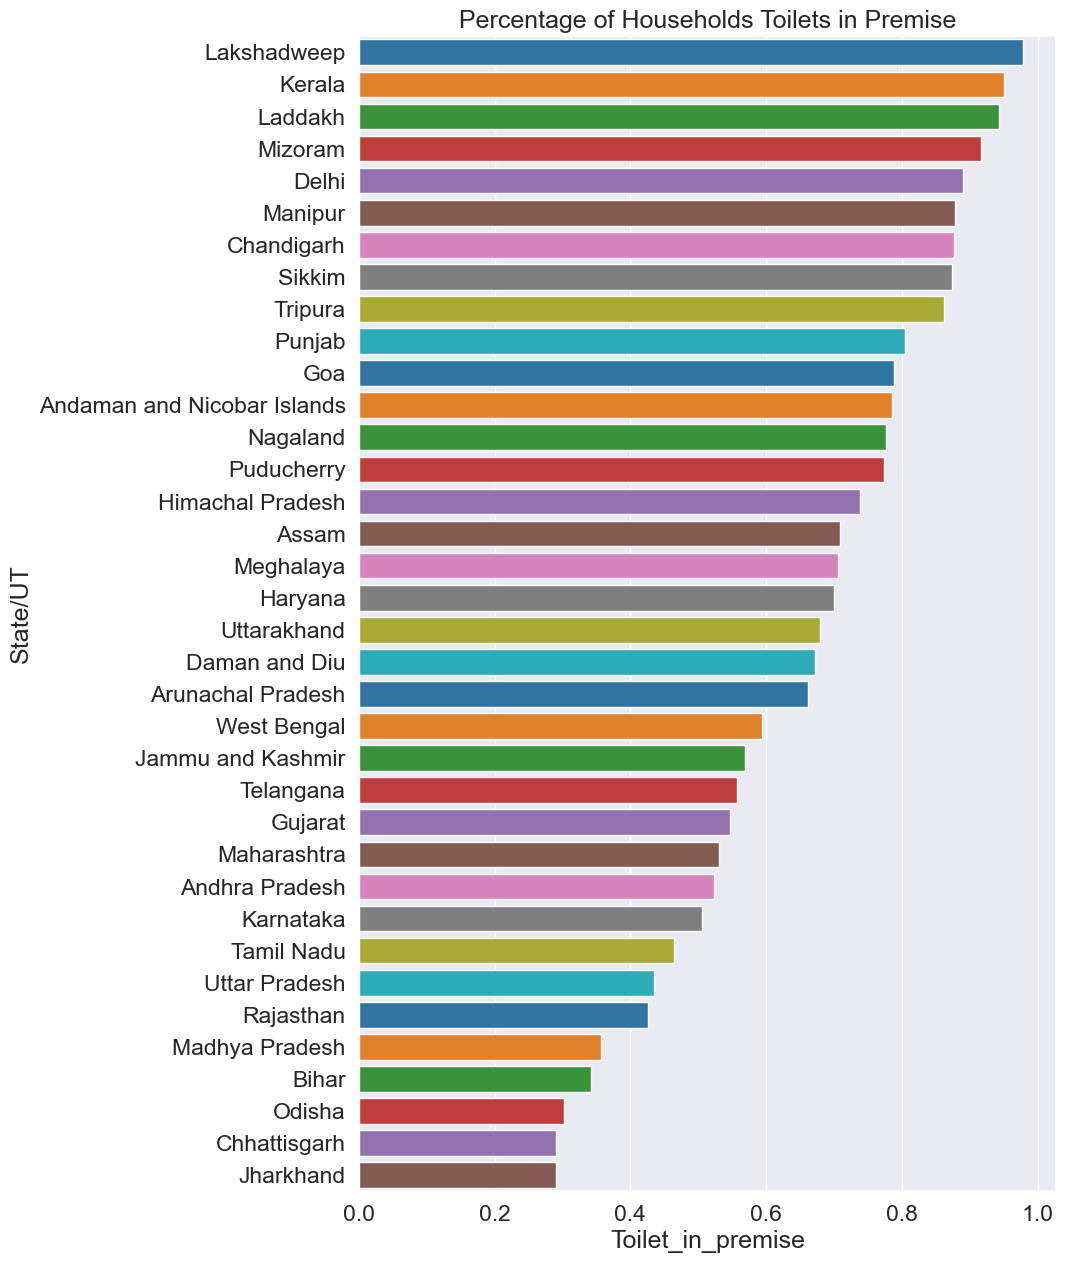

In [82]:
#ploting graph for Percentage of Households Toilets in Premise
fig, ax = plt.subplots(figsize=(9, 15))
sns.set(font_scale=1.5)
sns.barplot(data = HousholdsToiletPercentage,
            x='Toilet_in_premise',
            y='State/UT', palette='tab10',ax=ax)
plt.title('Percentage of Households Toilets in Premise')

# for i in ax.containers:
#     ax.bar_label(i)

## PS:9, Inconsistency in different datasets due to unavailability of data

# PS:10 Fixing the header

In [83]:
#importing and making copy of the data and working on the copied data
hospital = pd.read_csv('hospitals.csv')
hospital_copy = hospital.copy()

In [84]:
#Naming unnamed columns as 'State/UT'
hospital_copy.rename( columns={'Unnamed: 0':'State/UT'}, inplace=True )

In [85]:
#Renaming the columns acronyms to its forms
hospital_copy.rename({'PHC': 'Number_of_Primary_Health_Centers',
                'CHC': 'Community_Health_Centers',
                'SDH': 'Sub-District/Divisional_Hospitals',
                'DH': 'District_Hospitals'}, axis=1,inplace=True)

In [86]:
hospital_copy

,State/UT,Number_of_Primary_Health_Centers,Community_Health_Centers,Sub-District/Divisional_Hospitals,District_Hospitals,Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796
5,Chandigarh,40,2,1,4,47,3756
6,Chhattisgarh,813,166,12,32,1023,14354
7,Dadra & Nagar Haveli,9,2,1,1,13,568
8,Daman & Diu,4,2,NaN,2,8,298
9,Delhi,534,25,9,47,615,20572


# PS: 11 Creating a function to alter the data to create uniformity

In [87]:
def Rename_Values(df):
    df['State/UT'] = df['State/UT'].str.title().replace(' & ',' and ', regex=True)
    
Rename_Values(hospital_copy)

In [88]:
hospital_copy.head(1)

,State/UT,Number_of_Primary_Health_Centers,Community_Health_Centers,Sub-District/Divisional_Hospitals,District_Hospitals,Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246


In [89]:
hospital_copy.to_csv('all_hospitals.csv')

# PS:12  Analyzing Healthcare facility disparity 

In [90]:
census_subset

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh,133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0
3,Laddakh,Kargil,140802.0,77785.0,63017.0,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Puducherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,12543.0,9428.0,85.0
636,Puducherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,16115.0,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [91]:
CensusStatePopulation = census_subset[['State/UT', 'Population']]

In [92]:
CensusStatePopulation = CensusStatePopulation.groupby(['State/UT'])[['Population']].sum().reset_index().sort_values(by= 'State/UT')

In [93]:
CensusStatePopulation

,State/UT,Population
0,Andaman and Nicobar Islands,380581.0
1,Andhra Pradesh,49386799.0
2,Arunachal Pradesh,1383727.0
3,Assam,31205576.0
4,Bihar,104099452.0
5,Chandigarh,1055450.0
6,Chhattisgarh,25545198.0
7,Dadra and Nagar Haveli,343709.0
8,Daman and Diu,243247.0
9,Delhi,16787941.0


In [94]:
Total_population = CensusStatePopulation['Population'].sum()

In [95]:
Total_population

1209007954.0

In [96]:
#CensusStatePopulation.insert(37,'State/UT',Total_population)
CensusStatePopulation.loc[len(CensusStatePopulation.index)] = ['All India', Total_population] 
CensusStatePopulation

,State/UT,Population
0,Andaman and Nicobar Islands,3.805810e+05
1,Andhra Pradesh,4.938680e+07
2,Arunachal Pradesh,1.383727e+06
3,Assam,3.120558e+07
4,Bihar,1.040995e+08
5,Chandigarh,1.055450e+06
6,Chhattisgarh,2.554520e+07
7,Dadra and Nagar Haveli,3.437090e+05
8,Daman and Diu,2.432470e+05
9,Delhi,1.678794e+07


In [97]:
HospitalsBeds = hospital_copy[['State/UT', 'HospitalBeds']]
HospitalsBeds

,State/UT,HospitalBeds
0,Andaman and Nicobar Islands,1246
1,Andhra Pradesh,60799
2,Arunachal Pradesh,2320
3,Assam,19115
4,Bihar,17796
5,Chandigarh,3756
6,Chhattisgarh,14354
7,Dadra and Nagar Haveli,568
8,Daman and Diu,298
9,Delhi,20572


In [98]:
HospitalsBedsPopulation = pd.merge(CensusStatePopulation,HospitalsBeds,how='inner')
HospitalsBedsPopulation['HospitalBeds'] = HospitalsBedsPopulation['HospitalBeds'].str.replace(',','')

In [99]:
HospitalsBedsPopulation

,State/UT,Population,HospitalBeds
0,Andaman and Nicobar Islands,3.805810e+05,1246
1,Andhra Pradesh,4.938680e+07,60799
2,Arunachal Pradesh,1.383727e+06,2320
3,Assam,3.120558e+07,19115
4,Bihar,1.040995e+08,17796
5,Chandigarh,1.055450e+06,3756
6,Chhattisgarh,2.554520e+07,14354
7,Dadra and Nagar Haveli,3.437090e+05,568
8,Daman and Diu,2.432470e+05,298
9,Delhi,1.678794e+07,20572


In [100]:
HospitalsBedsPopulation['HospitalBeds'] = HospitalsBedsPopulation['HospitalBeds'].astype(int)

In [101]:
Beds_Per_ten_thousand_People = (HospitalsBedsPopulation['HospitalBeds'] / HospitalsBedsPopulation['Population']) * 10000

In [102]:
HospitalsBedsPopulation.insert(3,'Beds_per_ten_thousands_people',Beds_Per_ten_thousand_People)


In [103]:
HospitalsBedsPopulation

,State/UT,Population,HospitalBeds,Beds_per_ten_thousands_people
0,Andaman and Nicobar Islands,3.805810e+05,1246,32.739417
1,Andhra Pradesh,4.938680e+07,60799,12.310780
2,Arunachal Pradesh,1.383727e+06,2320,16.766313
3,Assam,3.120558e+07,19115,6.125508
4,Bihar,1.040995e+08,17796,1.709519
5,Chandigarh,1.055450e+06,3756,35.586717
6,Chhattisgarh,2.554520e+07,14354,5.619060
7,Dadra and Nagar Haveli,3.437090e+05,568,16.525607
8,Daman and Diu,2.432470e+05,298,12.250922
9,Delhi,1.678794e+07,20572,12.254034


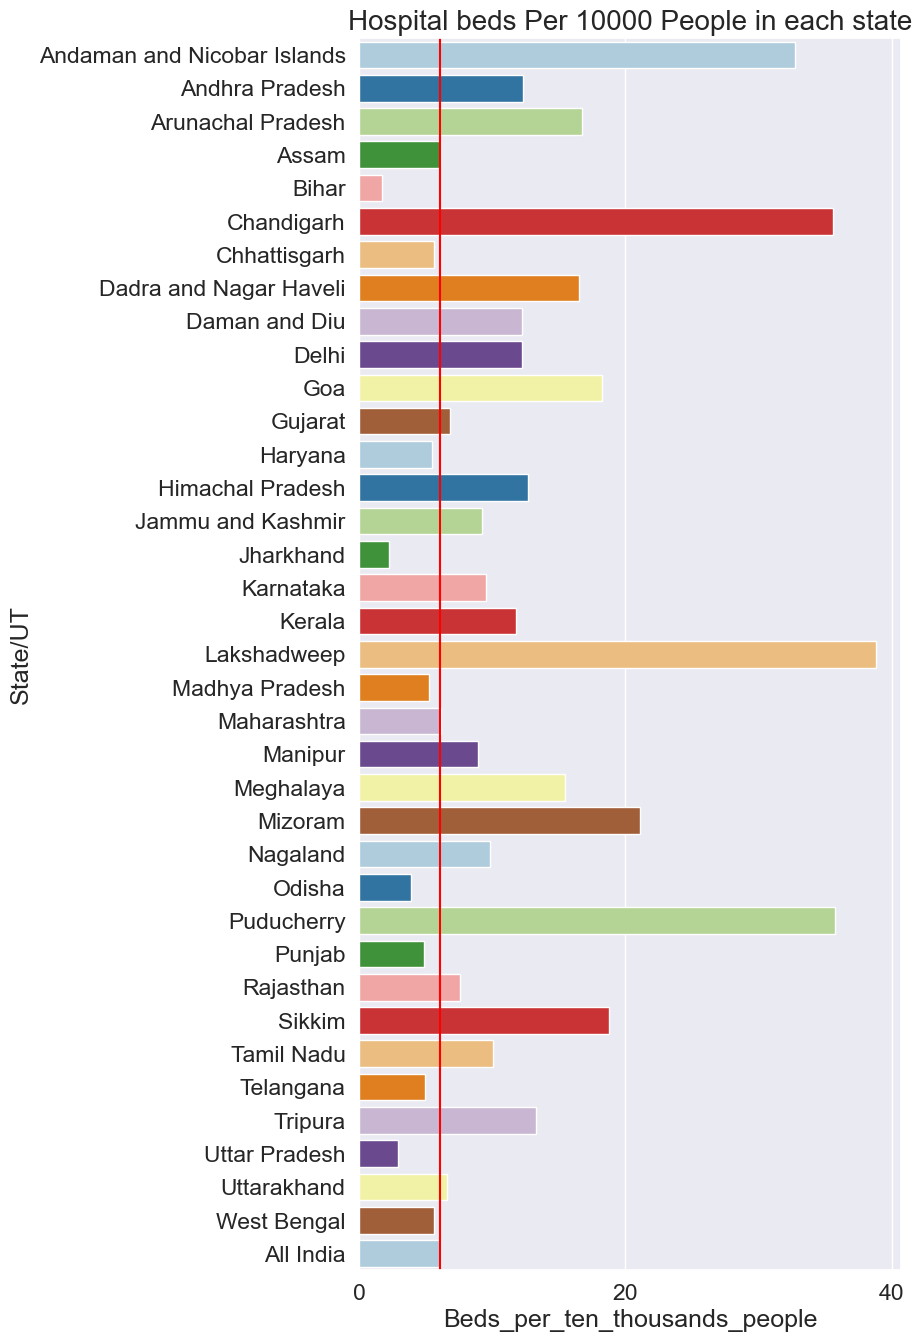

In [104]:
fig, ax = plt.subplots(figsize=(7, 16))
sns.set(font_scale=3.5)
sns.barplot(data = HospitalsBedsPopulation,
            x='Beds_per_ten_thousands_people',
            y='State/UT', palette='Paired',ax=ax)
plt.title('Hospital beds Per 10000 People in each state',fontsize=20)

plt.axvline(x = 6.112648,
            color ='red')

In [105]:
HospitalsBedsPopulation = HospitalsBedsPopulation.sort_values(by = 'Beds_per_ten_thousands_people',ascending=False)

In [106]:
HospitalsBedsPopulation.tail(3)

,State/UT,Population,HospitalBeds,Beds_per_ten_thousands_people
33,Uttar Pradesh,199812341.0,58310,2.918238
15,Jharkhand,32988134.0,7404,2.244443
4,Bihar,104099452.0,17796,1.709519


Text(0.5, 1.0, 'Hospital beds Per 10000 People in least 3 state')

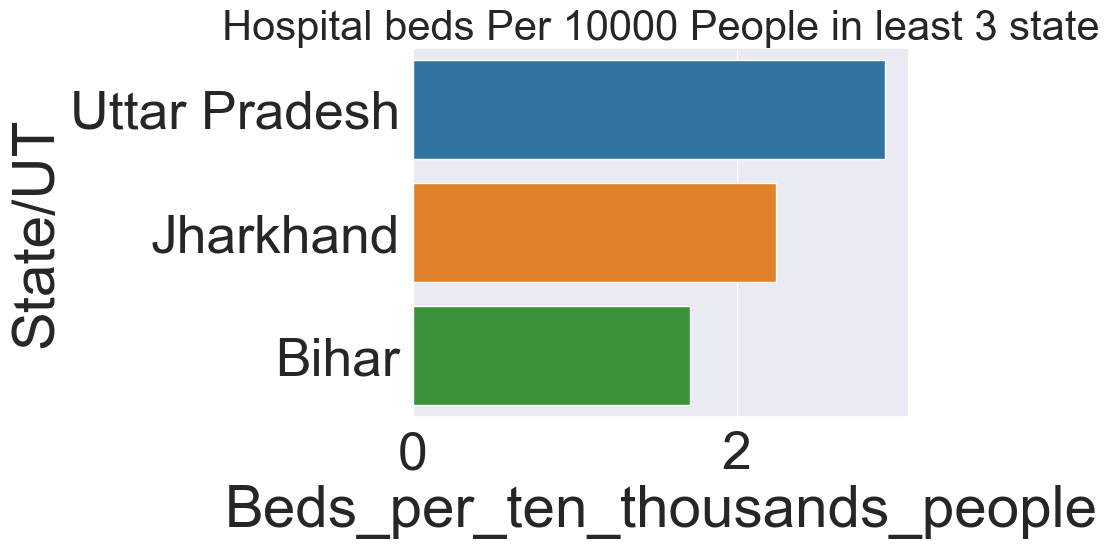

In [107]:
#Least Number of bed in the state
sns.barplot(data=HospitalsBedsPopulation.tail(3),
            x='Beds_per_ten_thousands_people',y='State/UT', 
            palette='tab10')
plt.title('Hospital beds Per 10000 People in least 3 state',fontsize=30)

# PS:13 Multi-line header

In [108]:
govtHospital = pd.read_csv('government_hospitals.csv')

In [109]:
govtHospital_copy = govtHospital.copy()
govtHospital_copy

,States/UTs,Rural hospitals,Unnamed: 2,Urban hospitals,Unnamed: 4,As on
0,NaN,No.,Beds,No.,Beds,NaN
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017
3,Assam,1176,10944,50,6198,31.12.2017
4,Bihar,930,6083,103,5936,31.12.2016
5,Chhattisgarh,169,5070,45,4342,01.01.2016
6,Goa*,17,1405,25,1608,31.12.2017
7,Gujarat,364,11715,122,20565,31.12.2016
8,Haryana*,609,6690,59,4550,31.12.2016
9,Himachal Pradesh*,705,5665,96,6734,31.12.2017


In [110]:
govtHospital_copy.columns

Index(['States/UTs', 'Rural hospitals', 'Unnamed: 2', 'Urban hospitals',
       'Unnamed: 4', 'As on'],
      dtype='object')

In [111]:
govtHospital_copy.rename({"States/UTs":"State/UT",
                             "Rural hospitals":"Rural_Government_Hospitals",
                             "Unnamed: 2":"Rural_Government_Beds",
                             "Urban hospitals":"Urban_Government_Hospitals",
                             "Unnamed: 4":"Urban_Government_Beds",
                             "As on":"Last_Updated"}, axis=1, inplace=True)

In [112]:
govtHospital_copy.columns

Index(['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds',
       'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last_Updated'],
      dtype='object')

In [113]:
govtHospital_copy.head()

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,NaN,No.,Beds,No.,Beds,NaN
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017
3,Assam,1176,10944,50,6198,31.12.2017
4,Bihar,930,6083,103,5936,31.12.2016


In [114]:
govtHospital_copy.drop(index=[0],axis=0,inplace=True)

In [115]:
govtHospital_copy.head(5)

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017
3,Assam,1176,10944,50,6198,31.12.2017
4,Bihar,930,6083,103,5936,31.12.2016
5,Chhattisgarh,169,5070,45,4342,01.01.2016


# PS 14: (Data update and code reuse)

In [116]:
govtHospital_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 1 to 37
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   State/UT                    37 non-null     object
 1   Rural_Government_Hospitals  37 non-null     object
 2   Rural_Government_Beds       37 non-null     object
 3   Urban_Government_Hospitals  37 non-null     object
 4   Urban_Government_Beds       37 non-null     object
 5   Last_Updated                36 non-null     object
dtypes: object(6)
memory usage: 1.9+ KB


In [117]:
govtHospital_copy['Last_Updated'] = pd.to_datetime(govtHospital_copy['Last_Updated']).dt.strftime('%Y/%m/%d')
govtHospital_copy['Last_Updated'] = pd.to_datetime(govtHospital_copy['Last_Updated'])

C:\Users\Miles Education\AppData\Local\Temp\ipykernel_7308\774595910.py:1: UserWarning: Parsing '31.12.2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  govtHospital_copy['Last_Updated'] = pd.to_datetime(govtHospital_copy['Last_Updated']).dt.strftime('%Y/%m/%d')
C:\Users\Miles Education\AppData\Local\Temp\ipykernel_7308\774595910.py:1: UserWarning: Parsing '31.12.2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  govtHospital_copy['Last_Updated'] = pd.to_datetime(govtHospital_copy['Last_Updated']).dt.strftime('%Y/%m/%d')
C:\Users\Miles Education\AppData\Local\Temp\ipykernel_7308\774595910.py:1: UserWarning: Parsing '30.12.2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  govtHospital_copy['Last_Updated'] = pd.to_datetime(govtHospital_copy['Last_Updated']).dt.strftime('%Y/%m/%d')
C:\Users\Miles Education\AppData\Local\T

In [118]:
govtHospital_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 1 to 37
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   State/UT                    37 non-null     object        
 1   Rural_Government_Hospitals  37 non-null     object        
 2   Rural_Government_Beds       37 non-null     object        
 3   Urban_Government_Hospitals  37 non-null     object        
 4   Urban_Government_Beds       37 non-null     object        
 5   Last_Updated                36 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 1.9+ KB


In [119]:
def hospital_state_change(s):
    return s.replace('*','')

def Uniform_Naming(s):
    s = s.title().split()
    t = []
    for i in s:
        if i in ["And",'AND','&']:
            t.append("and")
        else:
            t.append(i)
            
    return " ".join(t)
    
govtHospital_copy['State/UT'] = govtHospital_copy['State/UT'].apply(hospital_state_change)
govtHospital_copy['State/UT'] = govtHospital_copy['State/UT'].apply(Uniform_Naming)

In [120]:
govtHospital_copy.to_csv('government_hospital.csv')

In [121]:
govtHospital_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 1 to 37
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   State/UT                    37 non-null     object        
 1   Rural_Government_Hospitals  37 non-null     object        
 2   Rural_Government_Beds       37 non-null     object        
 3   Urban_Government_Hospitals  37 non-null     object        
 4   Urban_Government_Beds       37 non-null     object        
 5   Last_Updated                36 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 1.9+ KB


# PS 15: (Government healthcare facility disparity)

In [122]:
#converting the data type of columns to integer data types
def Convert_to_Int(x):
    if ',' in str(x):
        return int(x.replace(",", ""))
    elif pd.isna(x):
        return x
    else:
        return int(x)

In [123]:
#applying the Convert_to_Int function to the dataframe
govtHospital_copy['Urban_Government_Hospitals'] = govtHospital_copy['Urban_Government_Hospitals'].apply(Convert_to_Int)
govtHospital_copy['Rural_Government_Hospitals'] = govtHospital_copy['Rural_Government_Hospitals'].apply(Convert_to_Int)
govtHospital_copy['Rural_Government_Beds'] = govtHospital_copy['Rural_Government_Beds'].apply(Convert_to_Int)
govtHospital_copy['Urban_Government_Beds'] = govtHospital_copy['Urban_Government_Beds'].apply(Convert_to_Int)

In [124]:
#Adding two column Total_Number_Of_Hospitals and Total_Number_Of_Beds
govtHospital_copy['Total_Number_Of_Hospitals'] = govtHospital_copy['Rural_Government_Hospitals'] + govtHospital_copy['Urban_Government_Hospitals']
govtHospital_copy['Total_Number_Of_Beds'] = govtHospital_copy['Rural_Government_Beds'] + govtHospital_copy['Urban_Government_Beds']
govtHospital_copy.loc[37,'State/UT'] = 'All India'
govtHospital_copy.tail(5)

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated,Total_Number_Of_Hospitals,Total_Number_Of_Beds
33,Daman and Diu,5,240,0,0,2015-12-31,5,240
34,Delhi,0,0,109,24383,2015-01-01,109,24383
35,Lakshadweep,9,300,0,0,2016-01-01,9,300
36,Puducherry,3,96,11,3473,2016-01-01,14,3569
37,All India,19810,279588,3772,431173,NaT,23582,710761


In [125]:
# sorting the govtHospital_copy dataframe Based on Total_Number_Of_Hospitals per state
TotalNumberOfBeds = govtHospital_copy.sort_values(by='Total_Number_Of_Beds',ascending=True)
TotalNumberOfHospital = govtHospital_copy.sort_values(by='Total_Number_Of_Hospitals',ascending=True)
TotalNumberOfHospital.head()

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated,Total_Number_Of_Hospitals,Total_Number_Of_Beds
31,Chandigarh,0,0,4,778,2016-12-31,4,778
33,Daman and Diu,5,240,0,0,2015-12-31,5,240
35,Lakshadweep,9,300,0,0,2016-01-01,9,300
32,Dadra and Nagar Haveli,10,273,1,316,2017-12-31,11,589
36,Puducherry,3,96,11,3473,2016-01-01,14,3569


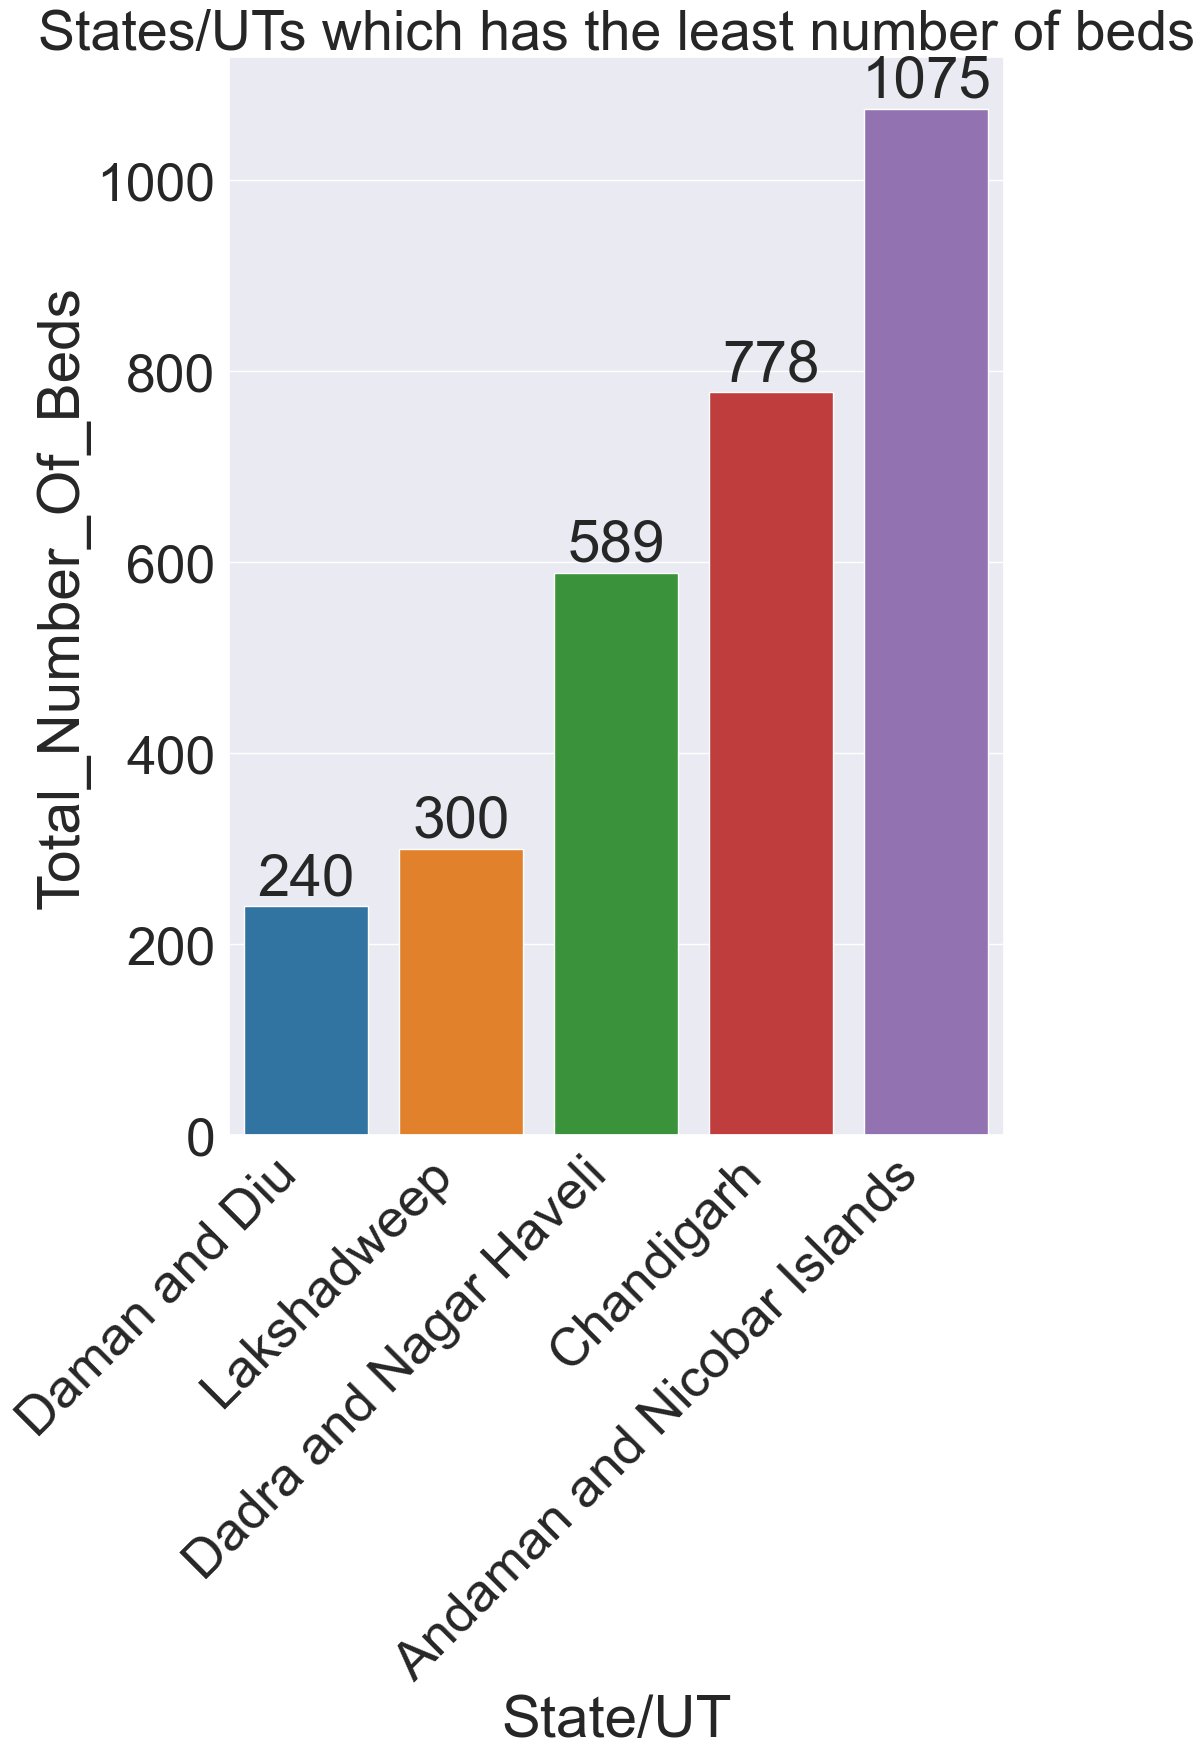

In [126]:
fig, ax = plt.subplots(figsize=(10, 14))
sns.barplot(data=TotalNumberOfBeds.head(5),
            x='State/UT',y='Total_Number_Of_Beds', 
            palette='tab10',ax=ax)
plt.title('States/UTs which has the least number of beds',fontsize=40)
plt.xticks(rotation=45,ha='right')
for i in ax.containers:
    ax.bar_label(i)
# sns.barplot( data=TotalNumberOfBeds.head() , y='State/UT', x='Total_Number_Of_Beds',palette='tab10')
# plt.title("States/UTs which have the least amount of beds")
# plt.show()

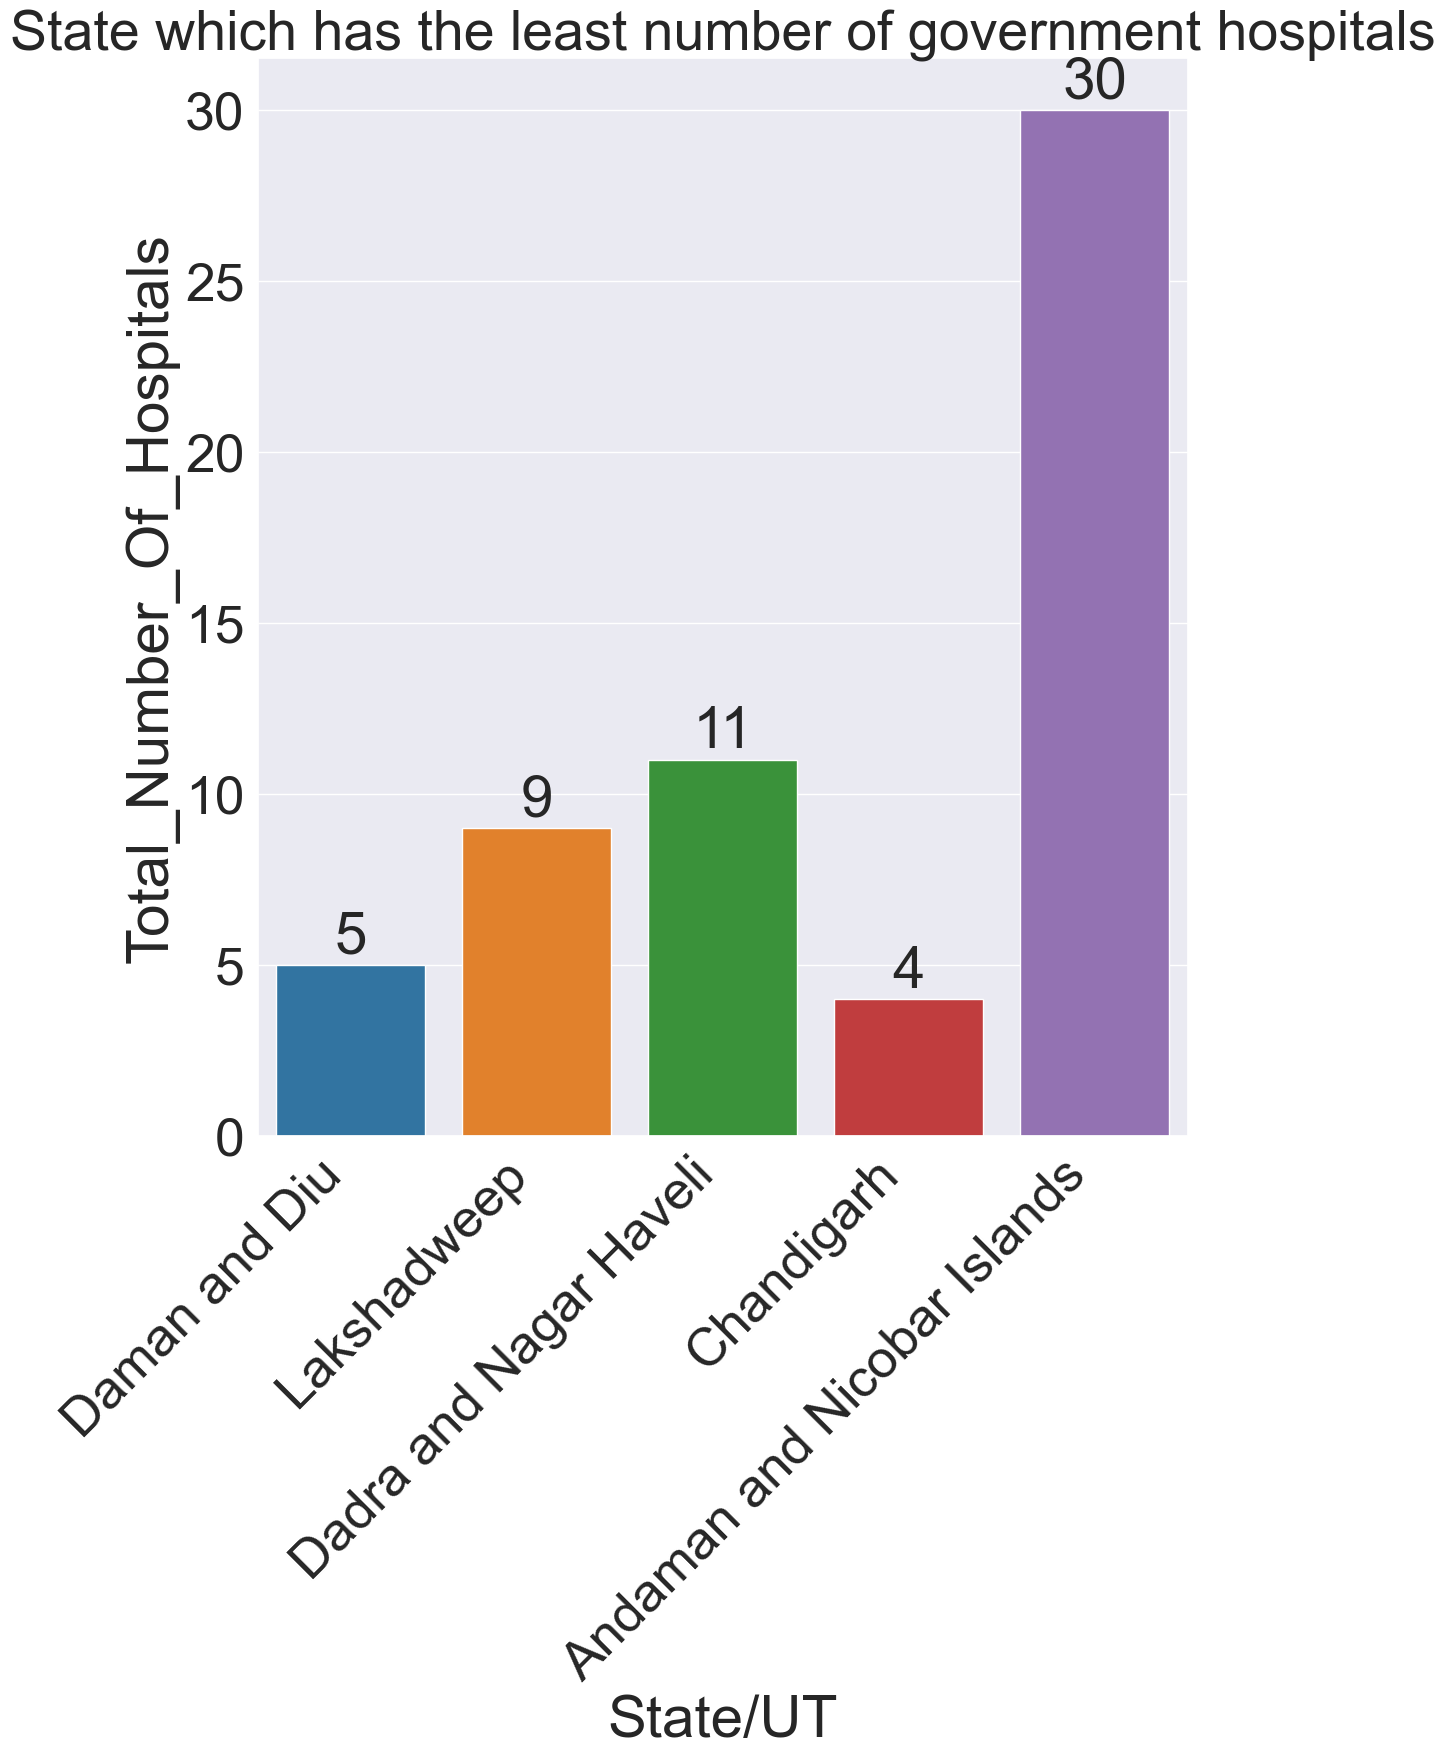

In [127]:
fig, ax = plt.subplots(figsize=(12, 14))
sns.barplot(data=TotalNumberOfBeds.head(5),
            x='State/UT',y='Total_Number_Of_Hospitals', 
            palette='tab10',ax=ax)
plt.title('State which has the least number of government hospitals',fontsize=40)

plt.xticks(rotation=45,ha='right')
for i in ax.containers:
    ax.bar_label(i)

# PS 16: (Gap in number of beds)

In [128]:
#Making new dataframe with all india population
l= [["All India", (census_subset.groupby(['State/UT'])['Population'].sum().sum()) ]]
All_India_Population = pd.DataFrame(l, columns = ['State/UT','Population'],index=[37])

# concating all India state with the total India's population row wise
All_India_Population = pd.concat([census_subset.groupby(['State/UT'])['Population'].sum().reset_index(), 
                                  All_India_Population], axis=0).sort_values(by='State/UT')
#(All_India_Population)


# merging the Number of Beds in india to all india population
All_India_Govt_Hospitals = pd.merge(left=All_India_Population, 
                                    right=govtHospital_copy[['State/UT','Total_Number_Of_Beds']] , 
                                    on='State/UT')
All_India_Govt_Hospitals.head(5)

,State/UT,Population,Total_Number_Of_Beds
0,All India,1.209008e+09,710761
1,Andaman and Nicobar Islands,3.805810e+05,1075
2,Andhra Pradesh,4.938680e+07,23138
3,Arunachal Pradesh,1.383727e+06,2404
4,Assam,3.120558e+07,17142


In [129]:
# getting number of beds for per 1000 people
All_India_Govt_Hospitals['Expected_No_Beds'] = All_India_Govt_Hospitals['Population'] * (3/1000)
#Calculating beds per 1000 people
All_India_Govt_Hospitals['Beds_per_people'] = (All_India_Govt_Hospitals['Total_Number_Of_Beds'] / 
                                               All_India_Govt_Hospitals['Population']) * 1000
#calculating Difference. 
All_India_Govt_Hospitals['Difference'] = All_India_Govt_Hospitals['Expected_No_Beds'] - All_India_Govt_Hospitals['Beds_per_people']

All_India_Govt_Hospitals = All_India_Govt_Hospitals.sort_values(by='Difference',ascending=True)
All_India_Govt_Hospitals.head(5)

,State/UT,Population,Total_Number_Of_Beds,Expected_No_Beds,Beds_per_people,Difference
19,Lakshadweep,64473.0,300,193.419,4.653111,188.765889
9,Daman and Diu,243247.0,240,729.741,0.986651,728.754349
8,Dadra and Nagar Haveli,343709.0,589,1031.127,1.713659,1029.413341
1,Andaman and Nicobar Islands,380581.0,1075,1141.743,2.824629,1138.918371
30,Sikkim,610577.0,1560,1831.731,2.554960,1829.176040


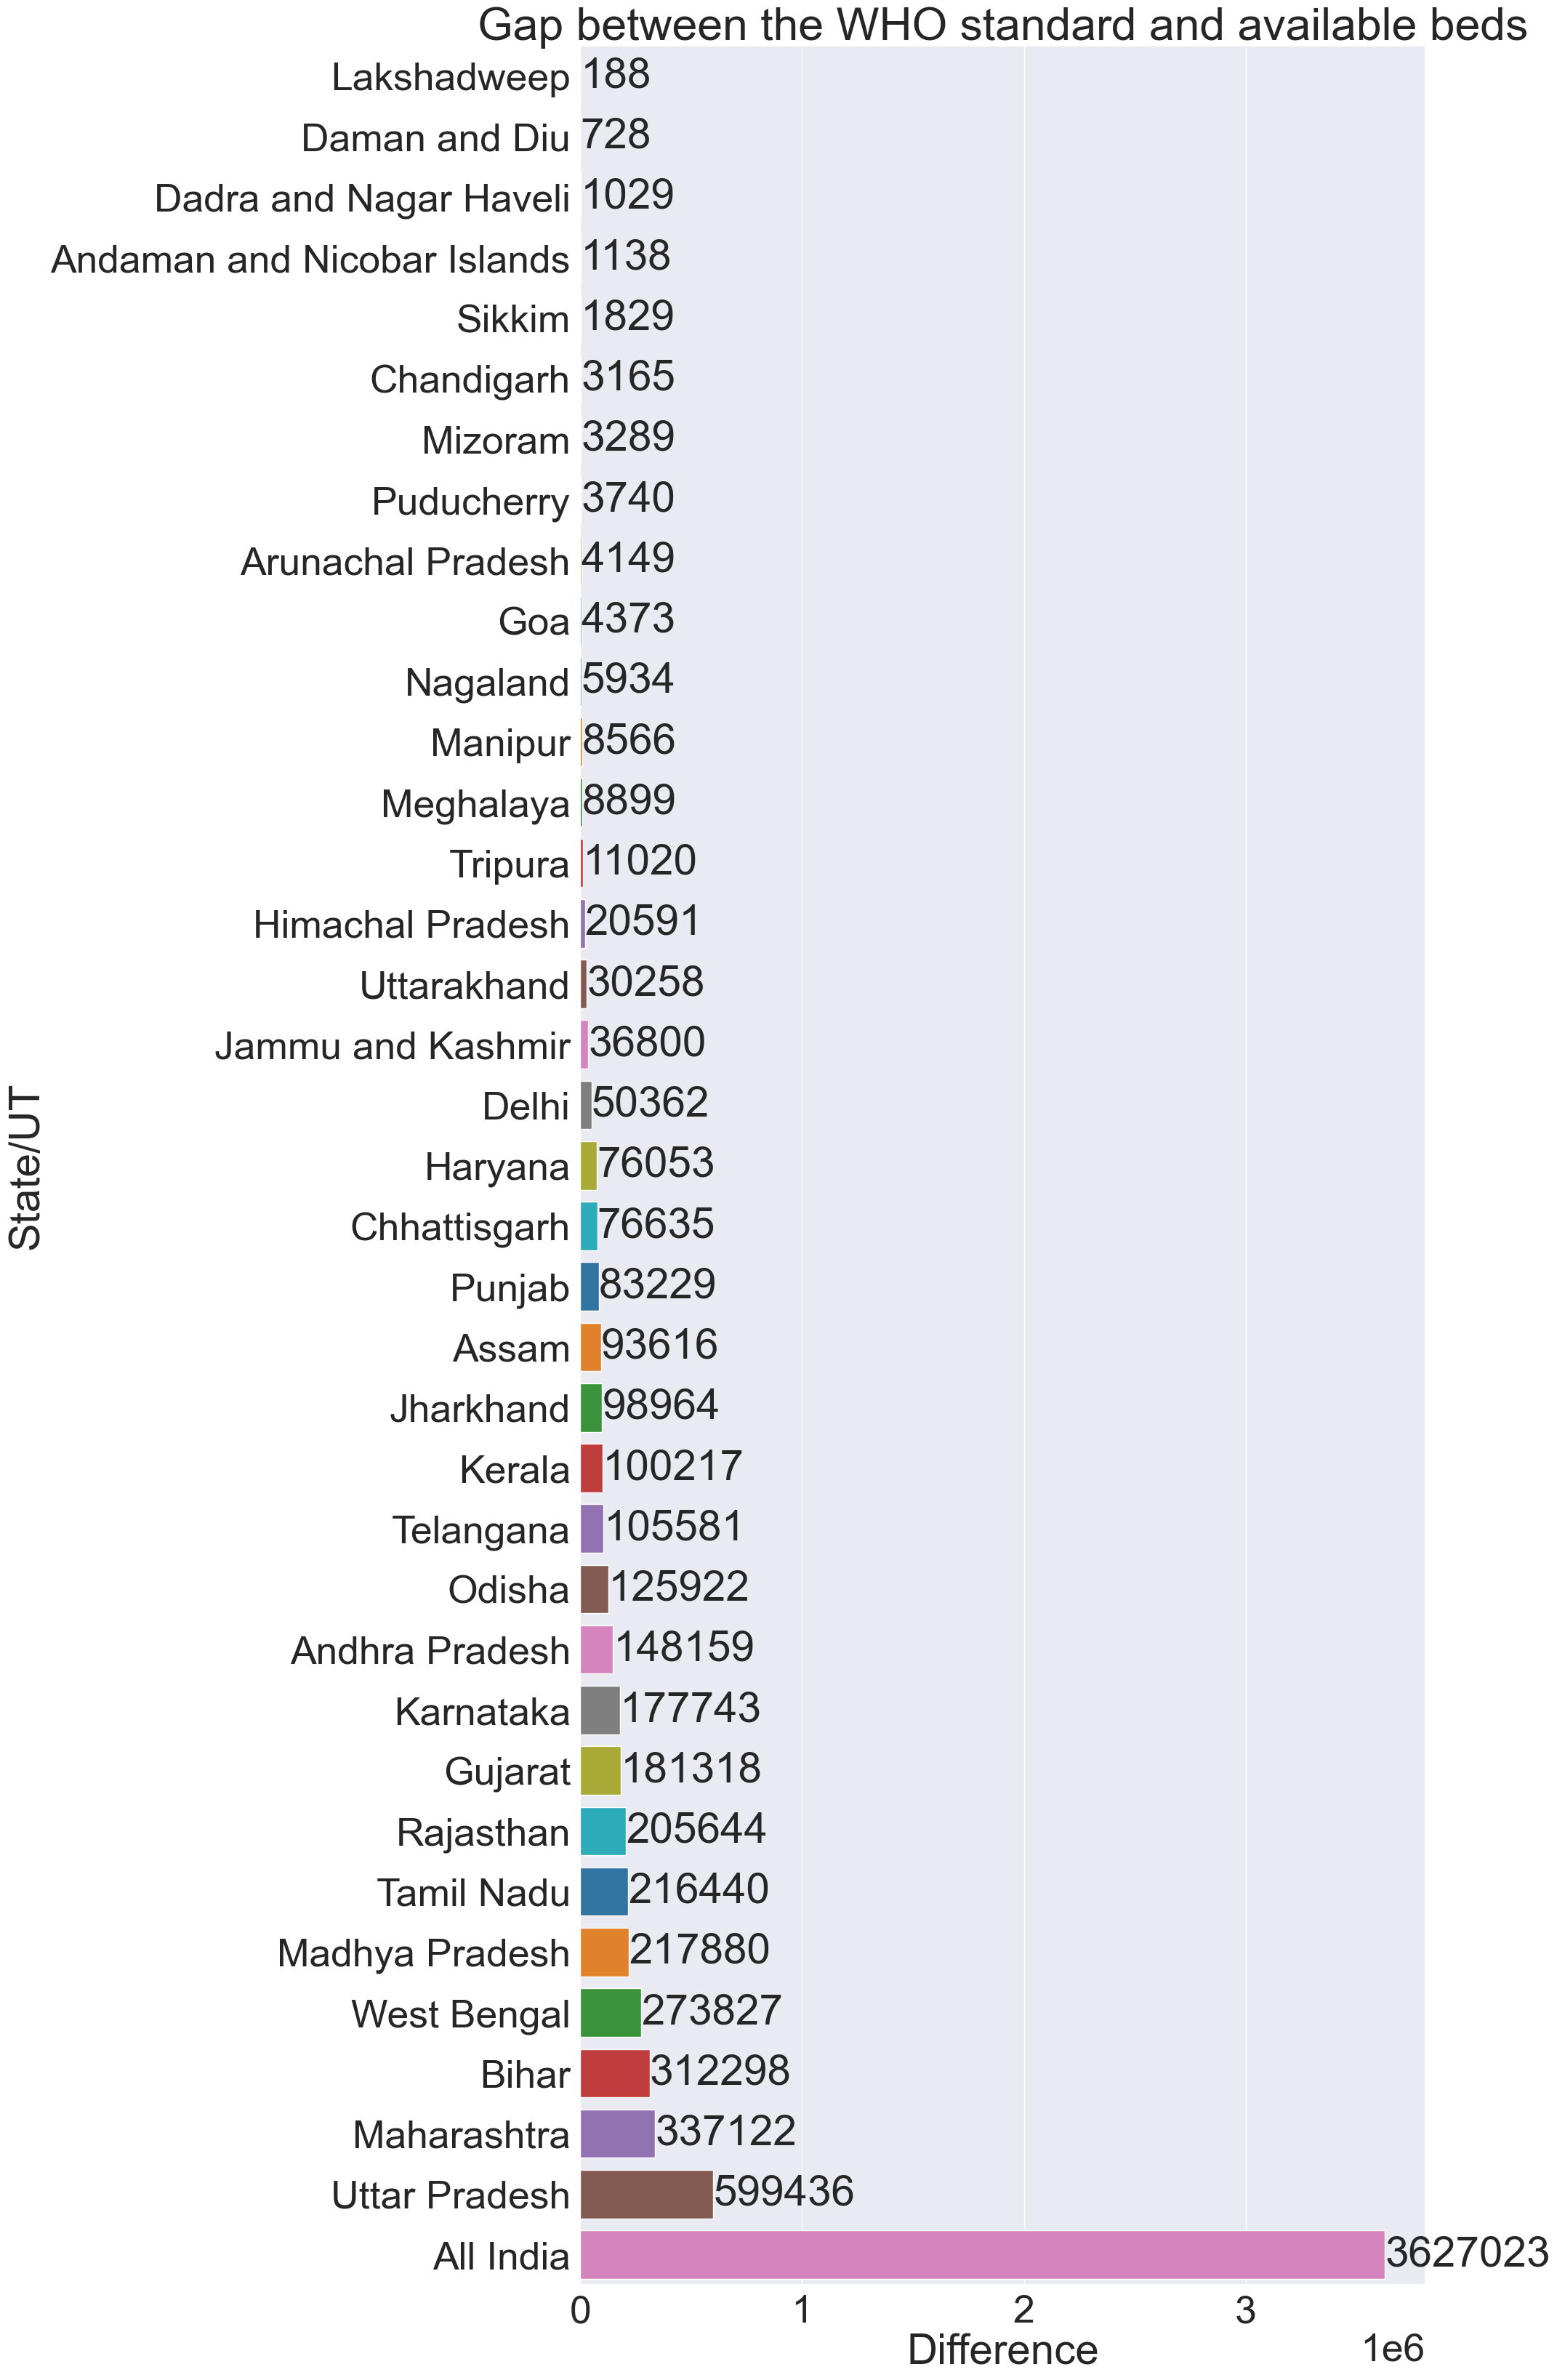

In [135]:
fig, ax = plt.subplots(figsize=(15, 40))
sns.barplot(data=All_India_Govt_Hospitals,
            x='Difference',y='State/UT', 
            palette='tab10',ax=ax)

plt.title('Gap between the WHO standard and available beds',fontsize=45)
ax.bar_label(ax.containers[0], fmt='%d')
plt.show()

# PS 17: (Hospitals required to meet the standards)

In [131]:
# as in index 0, number of beds in India is given. So dropping that record to find the mean
Avg_No_Of_Beds = int(All_India_Govt_Hospitals['Total_Number_Of_Beds'].drop(index=0,axis=0).mean())
Avg_No_Of_Beds

19743

In [132]:
# getting the gap of number of beds in integer
All_India_Govt_Hospitals['Expected_ Gap'] = (Avg_No_Of_Beds / All_India_Govt_Hospitals['Difference']).apply(Convert_to_Int)
All_India_Govt_Hospitals

,State/UT,Population,Total_Number_Of_Beds,Expected_No_Beds,Beds_per_people,Difference,Expected_ Gap
19,Lakshadweep,6.447300e+04,300,193.419,4.653111,1.887659e+02,104
9,Daman and Diu,2.432470e+05,240,729.741,0.986651,7.287543e+02,27
8,Dadra and Nagar Haveli,3.437090e+05,589,1031.127,1.713659,1.029413e+03,19
1,Andaman and Nicobar Islands,3.805810e+05,1075,1141.743,2.824629,1.138918e+03,17
30,Sikkim,6.105770e+05,1560,1831.731,2.554960,1.829176e+03,10
6,Chandigarh,1.055450e+06,778,3166.350,0.737126,3.165613e+03,6
24,Mizoram,1.097206e+06,1997,3291.618,1.820078,3.289798e+03,6
27,Puducherry,1.247953e+06,3569,3743.859,2.859883,3.740999e+03,5
3,Arunachal Pradesh,1.383727e+06,2404,4151.181,1.737337,4.149444e+03,4
11,Goa,1.458545e+06,3013,4375.635,2.065757,4.373569e+03,4


In [133]:
# # taking those states which have least Ratio for number of beds per 10000 people
# fig, ax = plt.subplots(figsize=(12, 22))
# # plt.figure(figsize=(12,22))
# sns.barplot(data=All_India_Govt_Hospitals, 
#             y='State/UT', x='Expected_Gap', 
#             palette='tab10', 
#             ax=ax).axvline(x=All_India_Govt_Hospitals.loc[0,'Expected_Gap'],color = 'red')

# # plt.title("Hospitals required to meet the standards",fontdict={'fontsize': 40})
# # plt.xlim(0,80000)
# # plt.ylabel("State/UT",fontdict={'fontsize': 30})
# # plt.xlabel("Number of Beds",fontdict={'fontsize': 30})
# # plt.show()

# # for i in ax.containers:
# #     ax.bar_label(i)